# Student Grade Prediction (JSON Dataset)

### Importing Packages

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Import Dataset

In [36]:
df = pd.read_json('original.json')
df.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
0,0,31,1,1,1,1,1,1,1,1,1,1,79.88045752,40,24.25,1.856388272,8,1,88.89,0
1,0,32,1,1,1,1,1,1,1,1,1,1,79.88045752,18,12.51,0.957666692,8,1,88.89,0
2,0,22,5,5,4,5,4,4,5,5,0,0,0,30,9.29,0.71116895,3,6,33.33,0
3,0,24,1,1,1,1,1,1,4,5,0,1,10.96595163,25,16.38,1.253923295,8,1,88.89,0
4,0,24,2,2,1,3,1,1,3,4,0,1,14.20329549,38,13.26,1.015080762,9,,100,0


### Information about Dataset

In [37]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             167 non-null    object
 1   Age                                167 non-null    object
 2   POLAR4 Quintile                    167 non-null    object
 3   POLAR3 Quintile                    167 non-null    object
 4   Adult HE 2001 Quintile             167 non-null    object
 5   Adult HE 2011 Quintile             167 non-null    object
 6   TUNDRA MSOA Quintile               167 non-null    object
 7   TUNDRA LSOA Quintile               167 non-null    object
 8   Gaps GCSE Quintile                 167 non-null    object
 9   Gaps GCSE Ethnicity Quintile       167 non-null    object
 10  Uni Connect target ward            167 non-null    object
 11  attending from home?               167 non-null    object
 12  distance

### Performing typecasting on string of integer data
- Numeric data was quoted by single quote or double quote so by default it was considered as string dtype ('11') just like this, but using pd.to_numeric() we are converting it to float dtype (11.00) like this.  

In [38]:
df = df.apply(pd.to_numeric,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             160 non-null    float64
 1   Age                                160 non-null    float64
 2   POLAR4 Quintile                    160 non-null    float64
 3   POLAR3 Quintile                    160 non-null    float64
 4   Adult HE 2001 Quintile             160 non-null    float64
 5   Adult HE 2011 Quintile             160 non-null    float64
 6   TUNDRA MSOA Quintile               160 non-null    float64
 7   TUNDRA LSOA Quintile               160 non-null    float64
 8   Gaps GCSE Quintile                 160 non-null    float64
 9   Gaps GCSE Ethnicity Quintile       160 non-null    float64
 10  Uni Connect target ward            160 non-null    float64
 11  attending from home?               160 non-null    float64

### Describing Dataset

In [39]:
df_describe = df.describe()
df_describe

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
count,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,159.000000,157.000000,157.000000,158.000000,157.000000,158.000000,160.000000
mean,0.168750,22.231250,3.606250,3.44375,2.918750,3.325000,2.906250,2.906250,3.706250,4.143750,0.11875,0.725000,32.724428,52.113208,21.019809,1.033662,8.886076,2.891720,74.947278,0.150000
std,0.375707,4.900548,1.410191,1.49105,1.283528,1.376122,1.272826,1.272826,1.469167,1.354456,0.32451,0.447916,52.919433,35.199968,18.562050,0.743462,3.220109,3.245469,26.555757,0.358193
min,0.000000,19.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,3.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,0.00000,0.000000,9.528501,33.000000,10.130000,0.597099,7.000000,0.000000,58.333333,0.000000
50%,0.000000,20.500000,4.000000,4.00000,3.000000,4.000000,3.000000,3.000000,4.000000,5.000000,0.00000,1.000000,17.205315,47.000000,17.500000,0.862037,10.000000,2.000000,83.333333,0.000000
75%,0.000000,22.000000,5.000000,5.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,0.00000,1.000000,34.247495,66.000000,25.870000,1.253923,12.000000,4.000000,100.000000,0.000000
max,1.000000,44.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.00000,1.000000,317.327363,335.000000,175.440000,5.503630,13.000000,15.000000,100.000000,1.000000


### Splitting data into Feature and label

In [40]:
df_features = df.drop('label (fail=1, pass=0)',axis=1)
df_label = df[['label (fail=1, pass=0)']]
print(df_features.info())
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             160 non-null    float64
 1   Age                                160 non-null    float64
 2   POLAR4 Quintile                    160 non-null    float64
 3   POLAR3 Quintile                    160 non-null    float64
 4   Adult HE 2001 Quintile             160 non-null    float64
 5   Adult HE 2011 Quintile             160 non-null    float64
 6   TUNDRA MSOA Quintile               160 non-null    float64
 7   TUNDRA LSOA Quintile               160 non-null    float64
 8   Gaps GCSE Quintile                 160 non-null    float64
 9   Gaps GCSE Ethnicity Quintile       160 non-null    float64
 10  Uni Connect target ward            160 non-null    float64
 11  attending from home?               160 non-null    float64

### Checking for correlation 

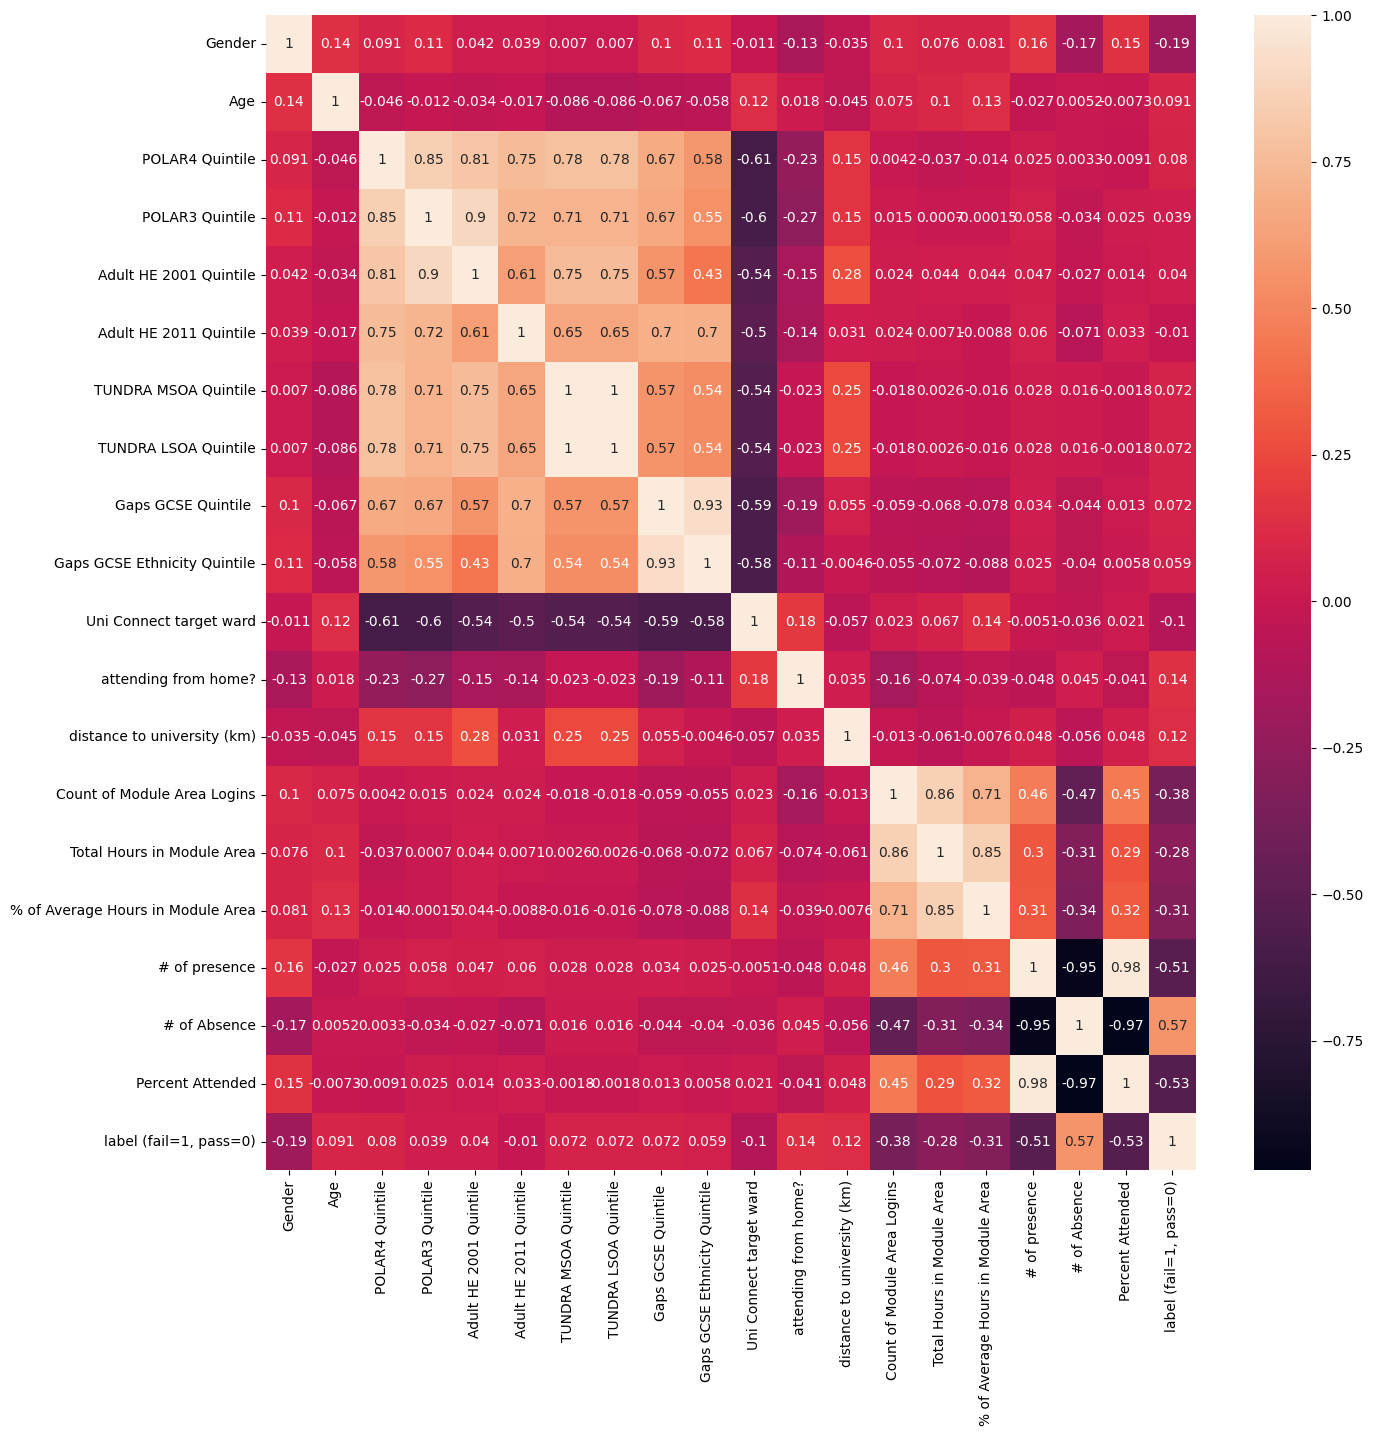

In [41]:
df_correlations = pd.concat([df_features,df_label],axis=1).corr()
plt.figure(figsize=(15,15))
df_correlations_plot = sns.heatmap(df_correlations,annot=True)
plt.show()

### Plotting Histogram Graph
- Histogram Xlabel shows us the numeric column data range and Ylabel shows us the number of records that we have in that certain range of data given in between two bins.

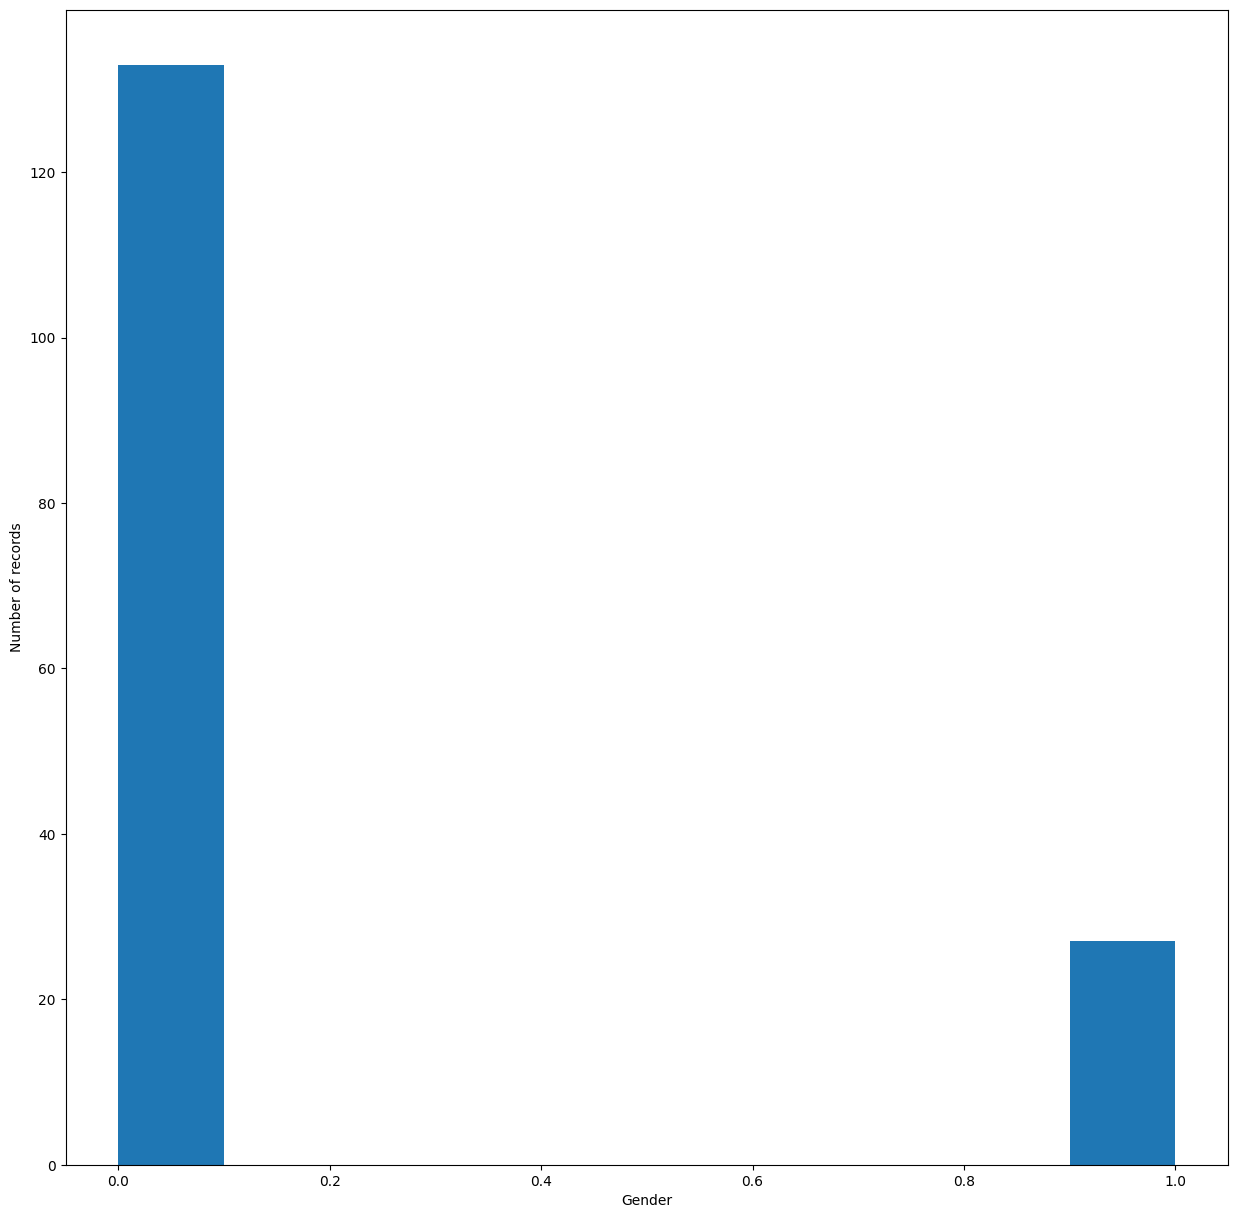

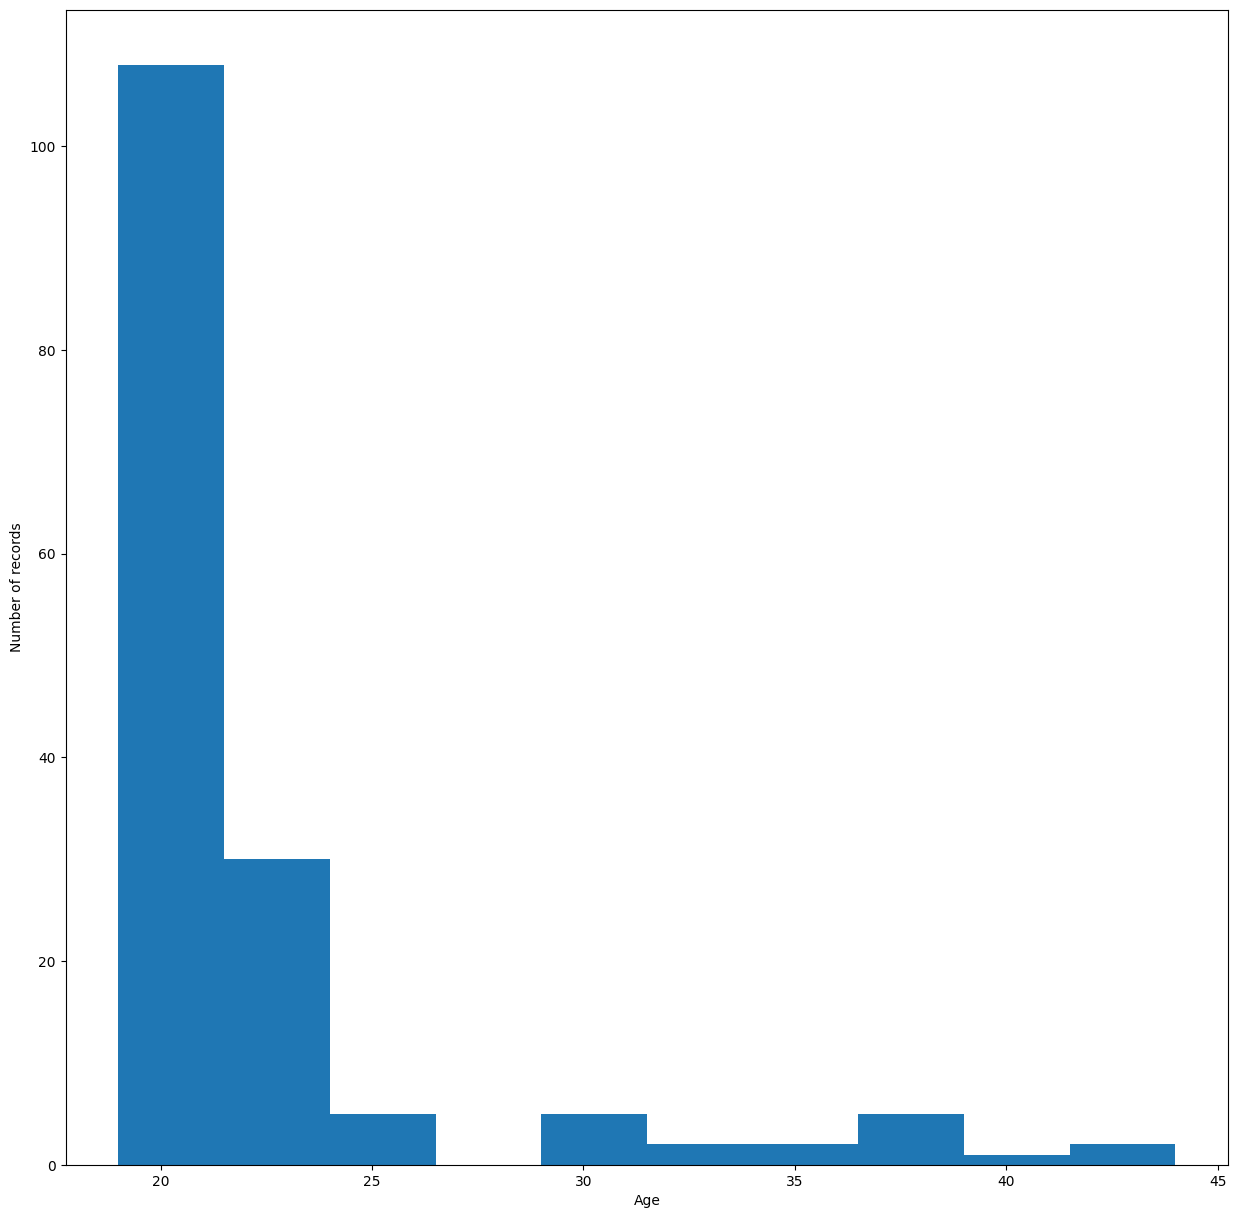

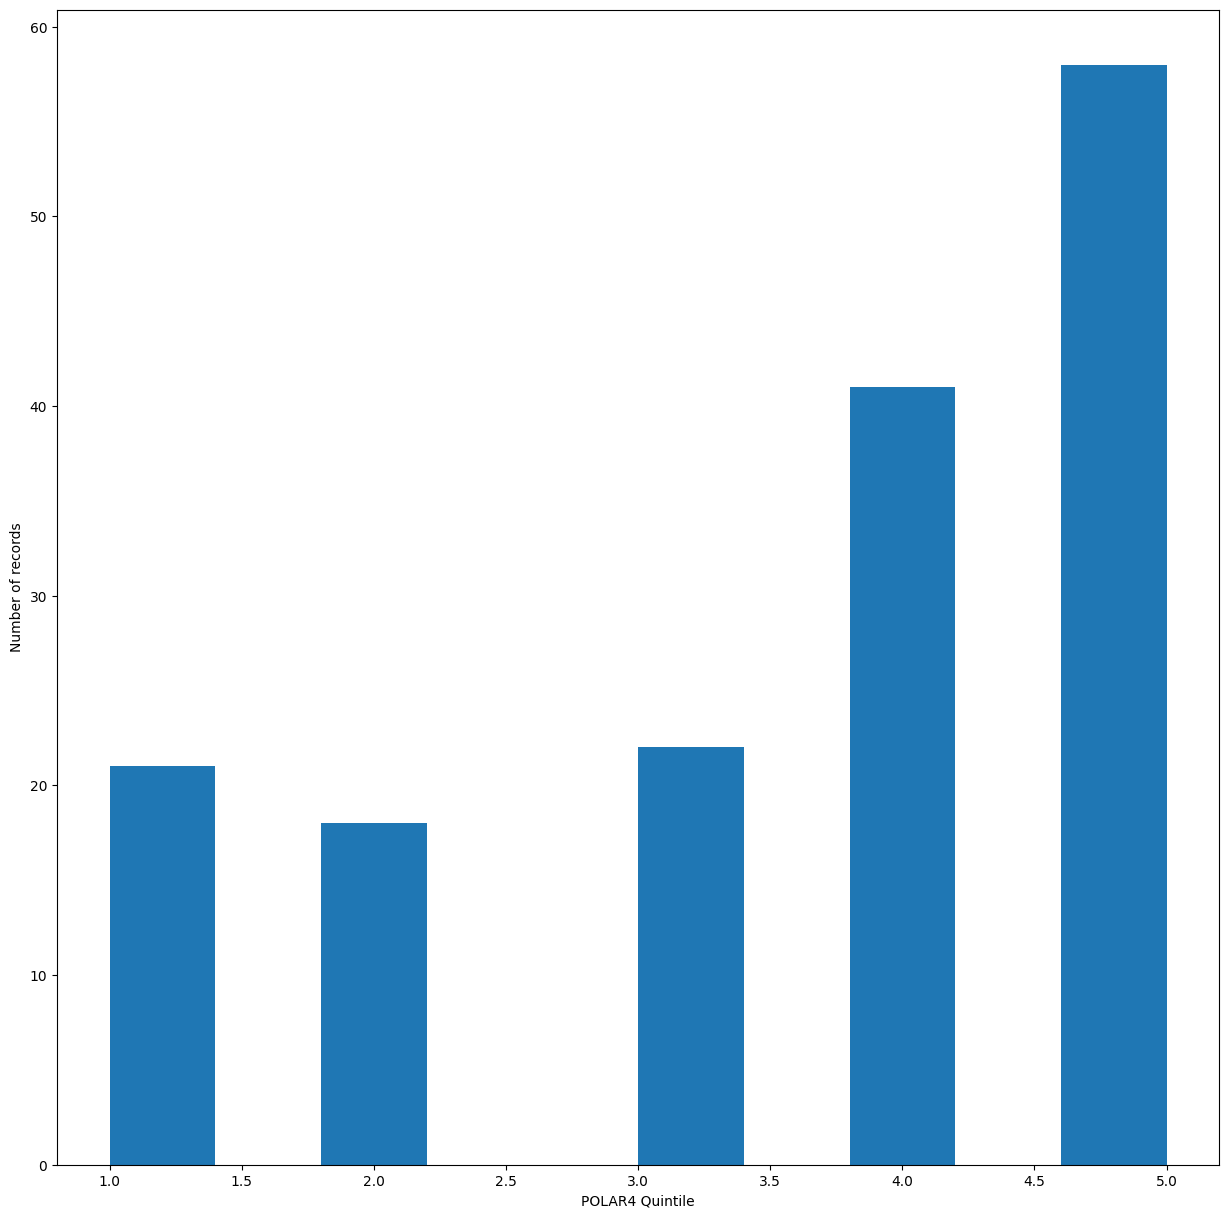

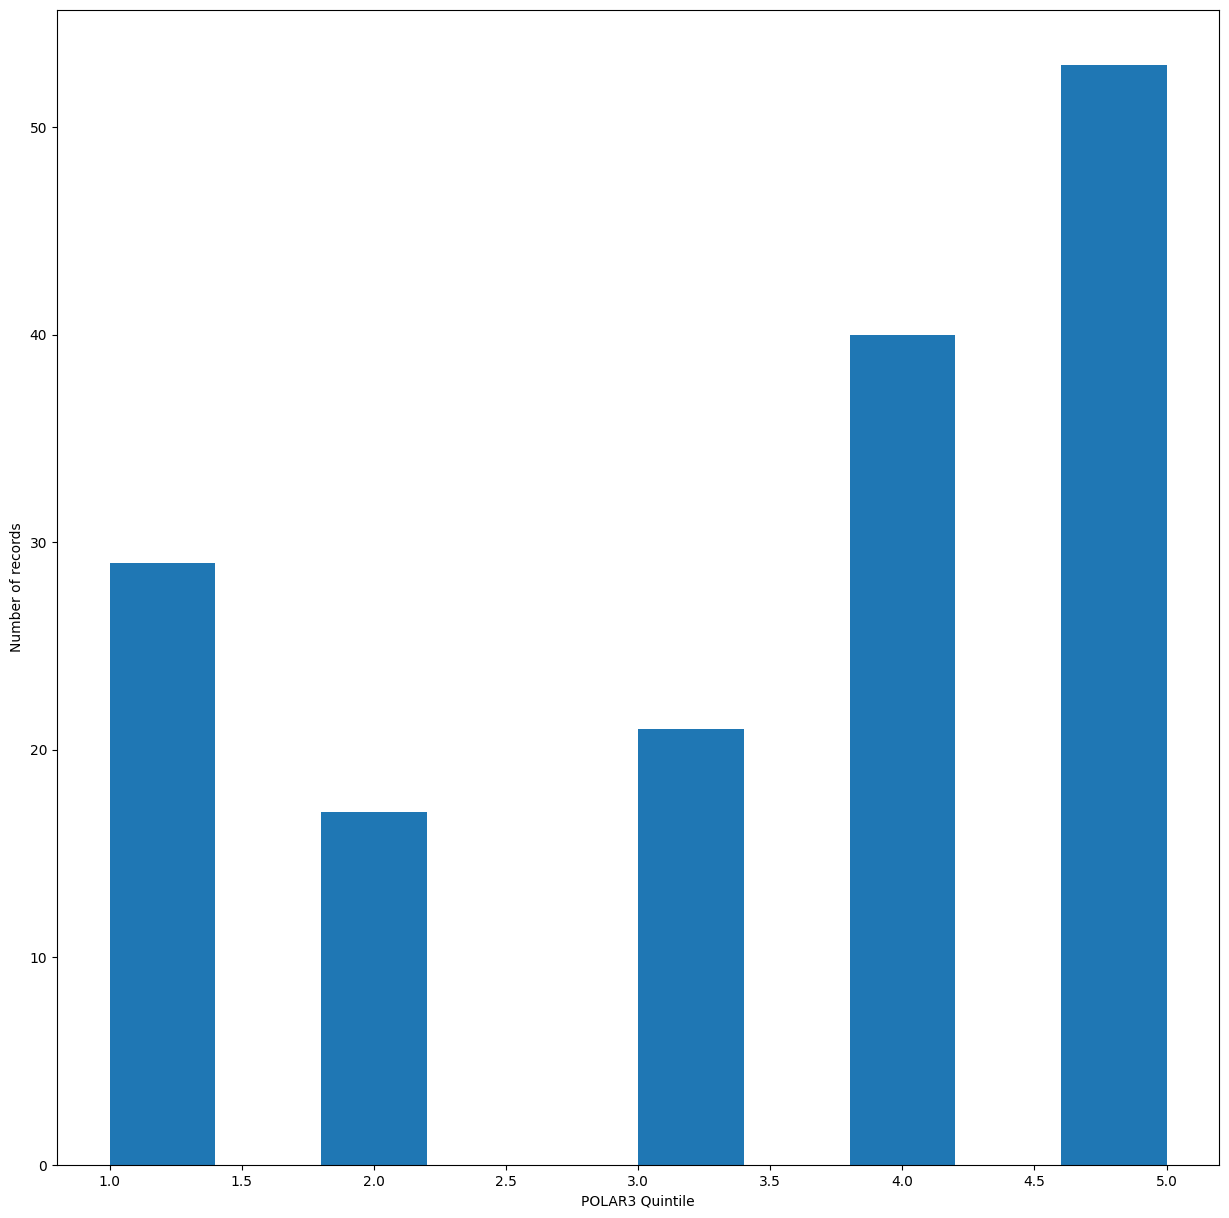

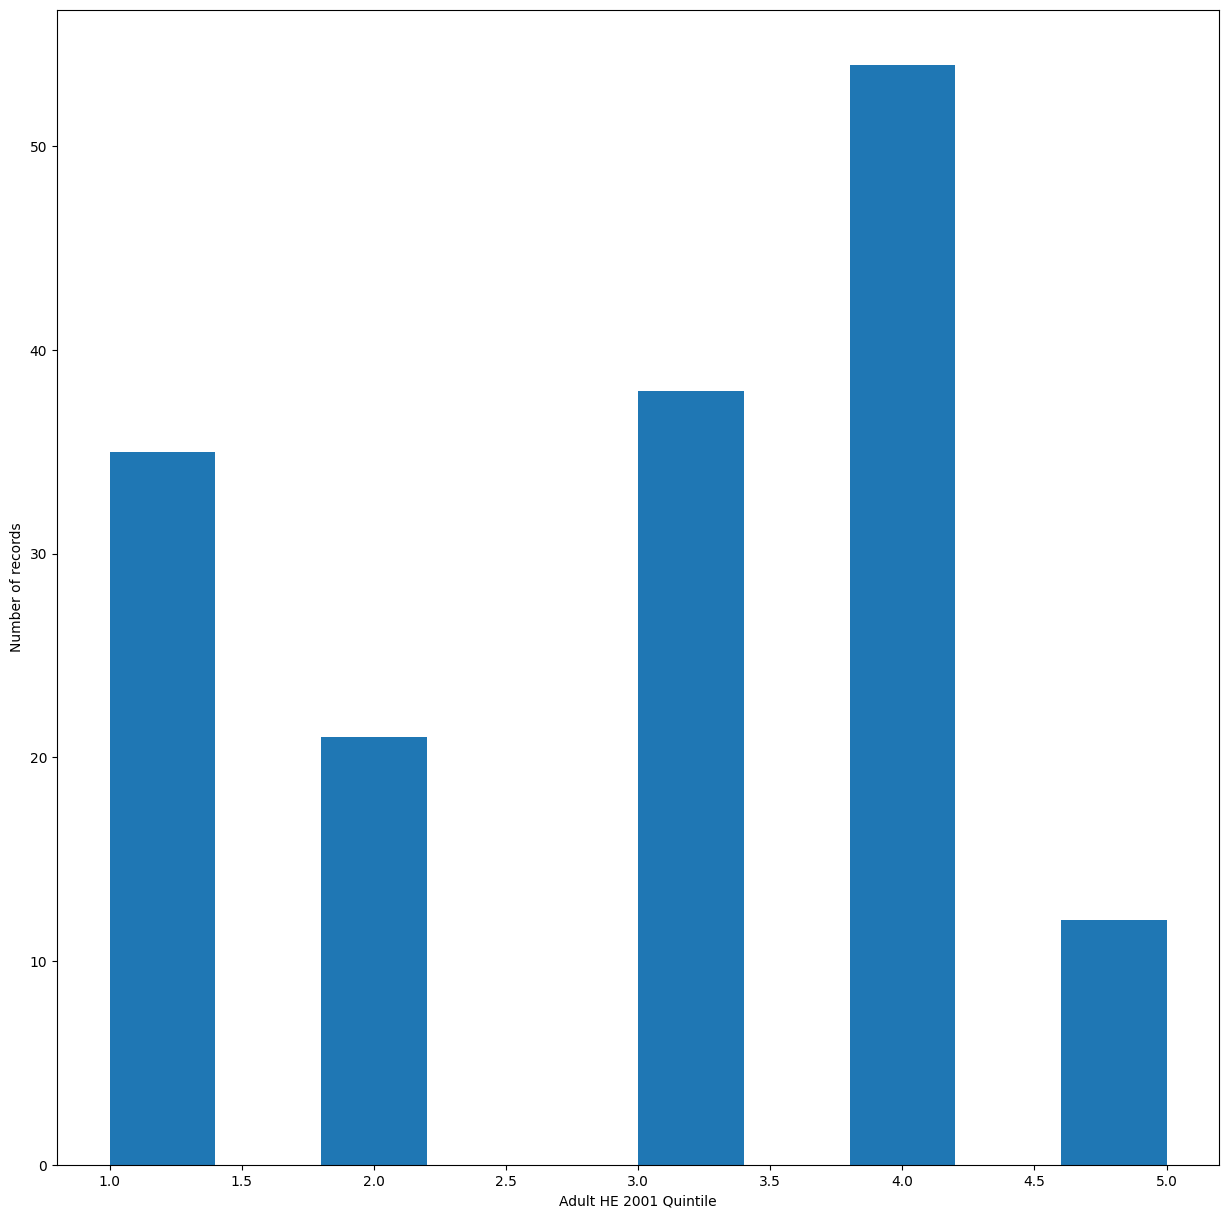

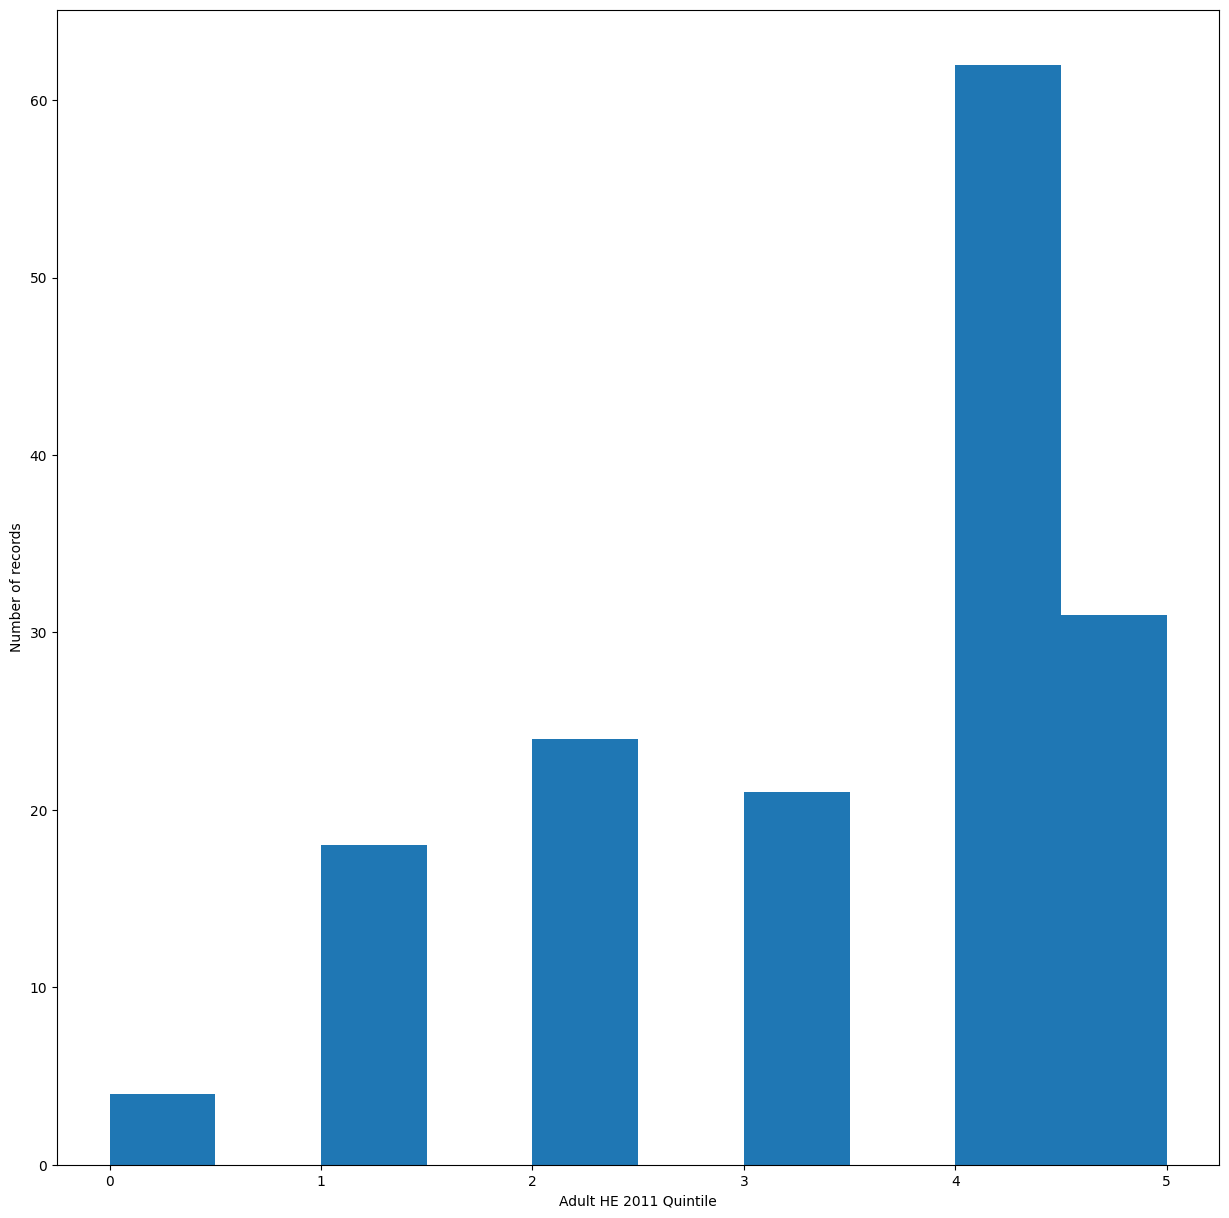

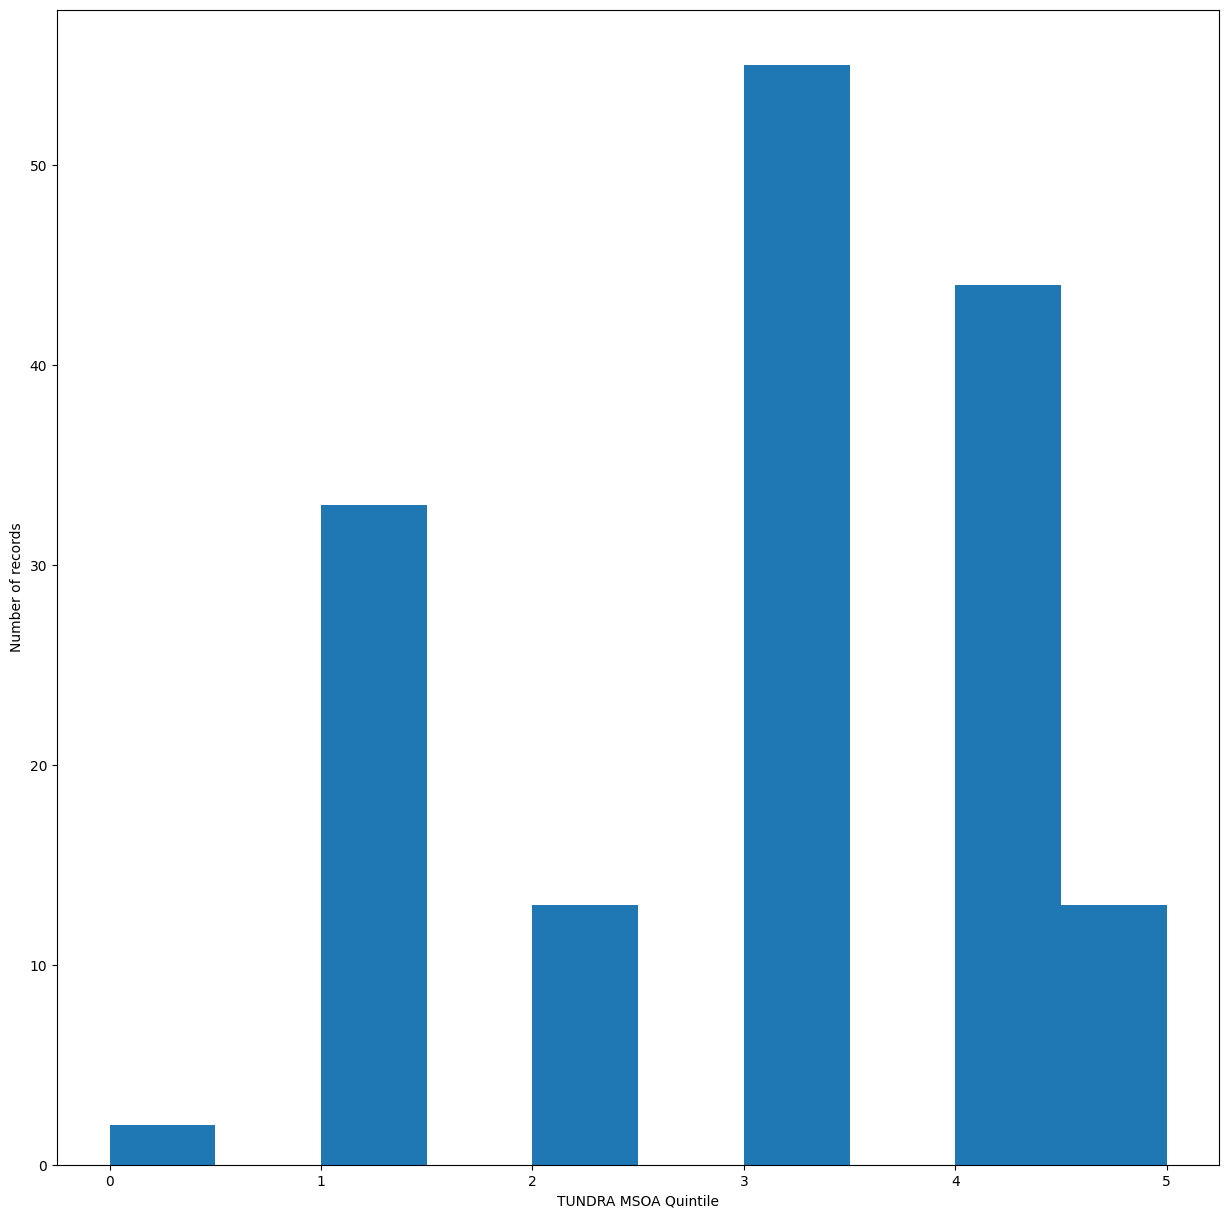

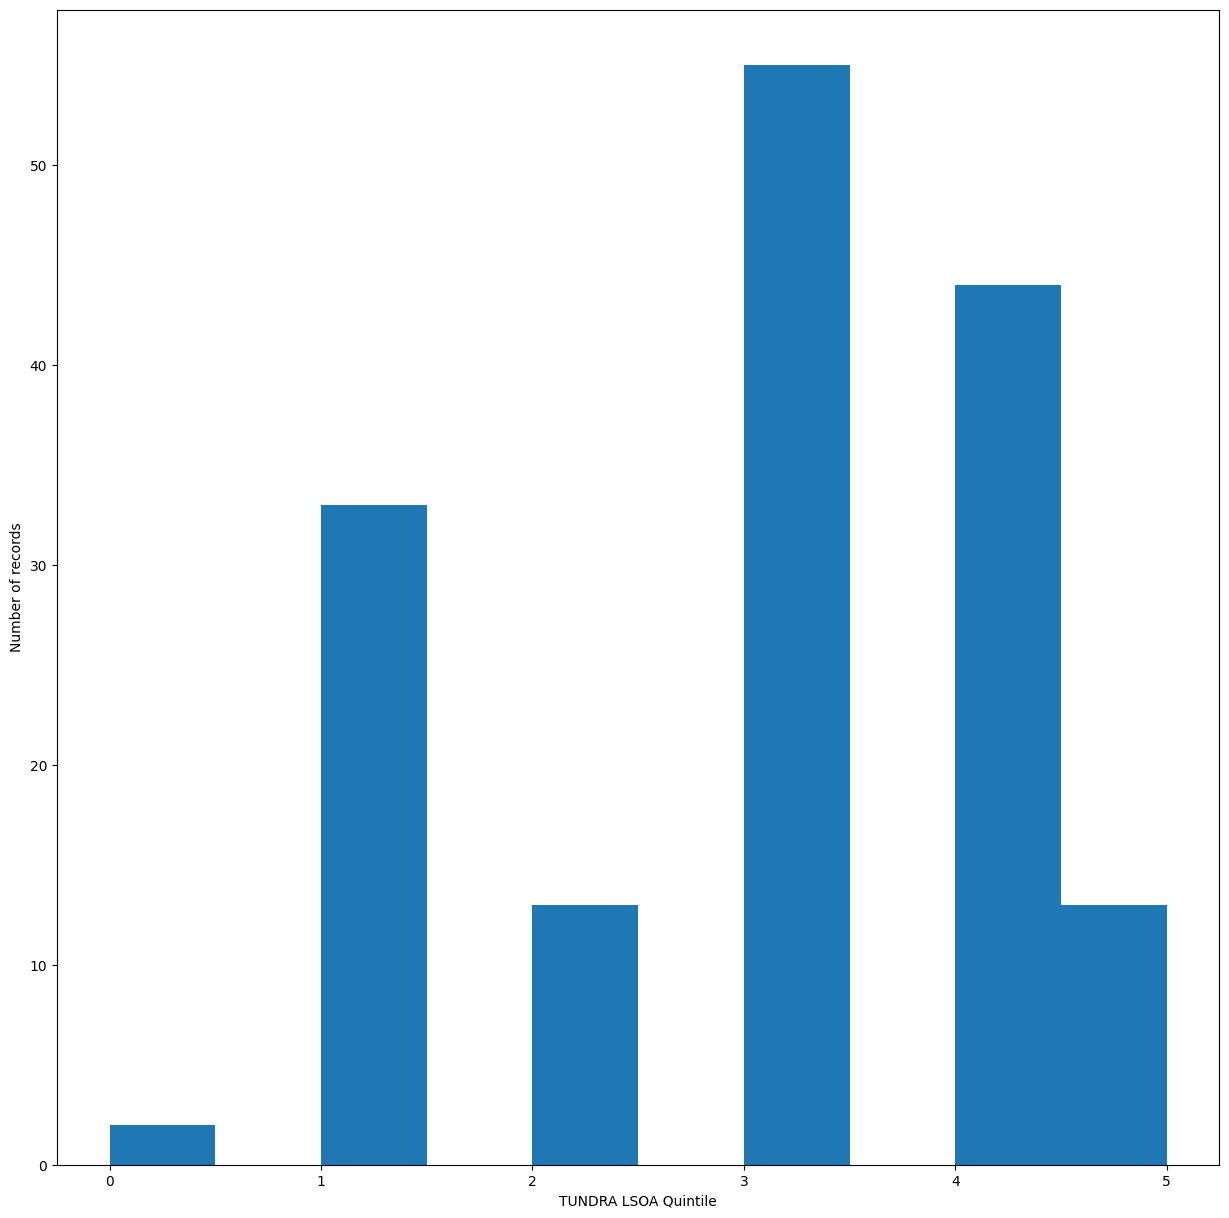

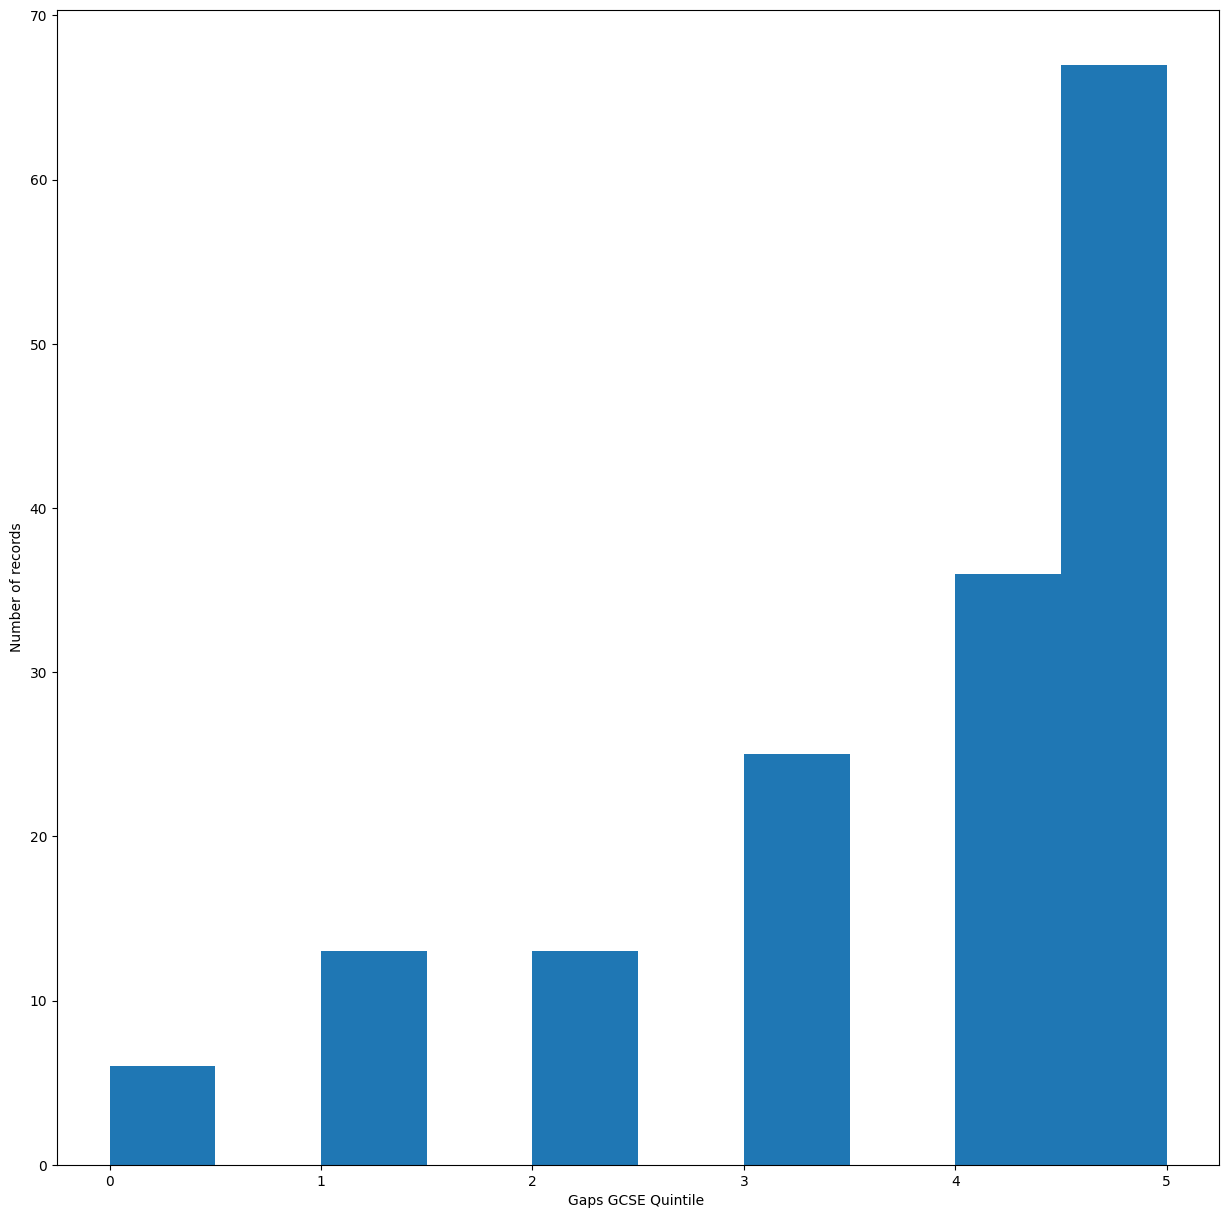

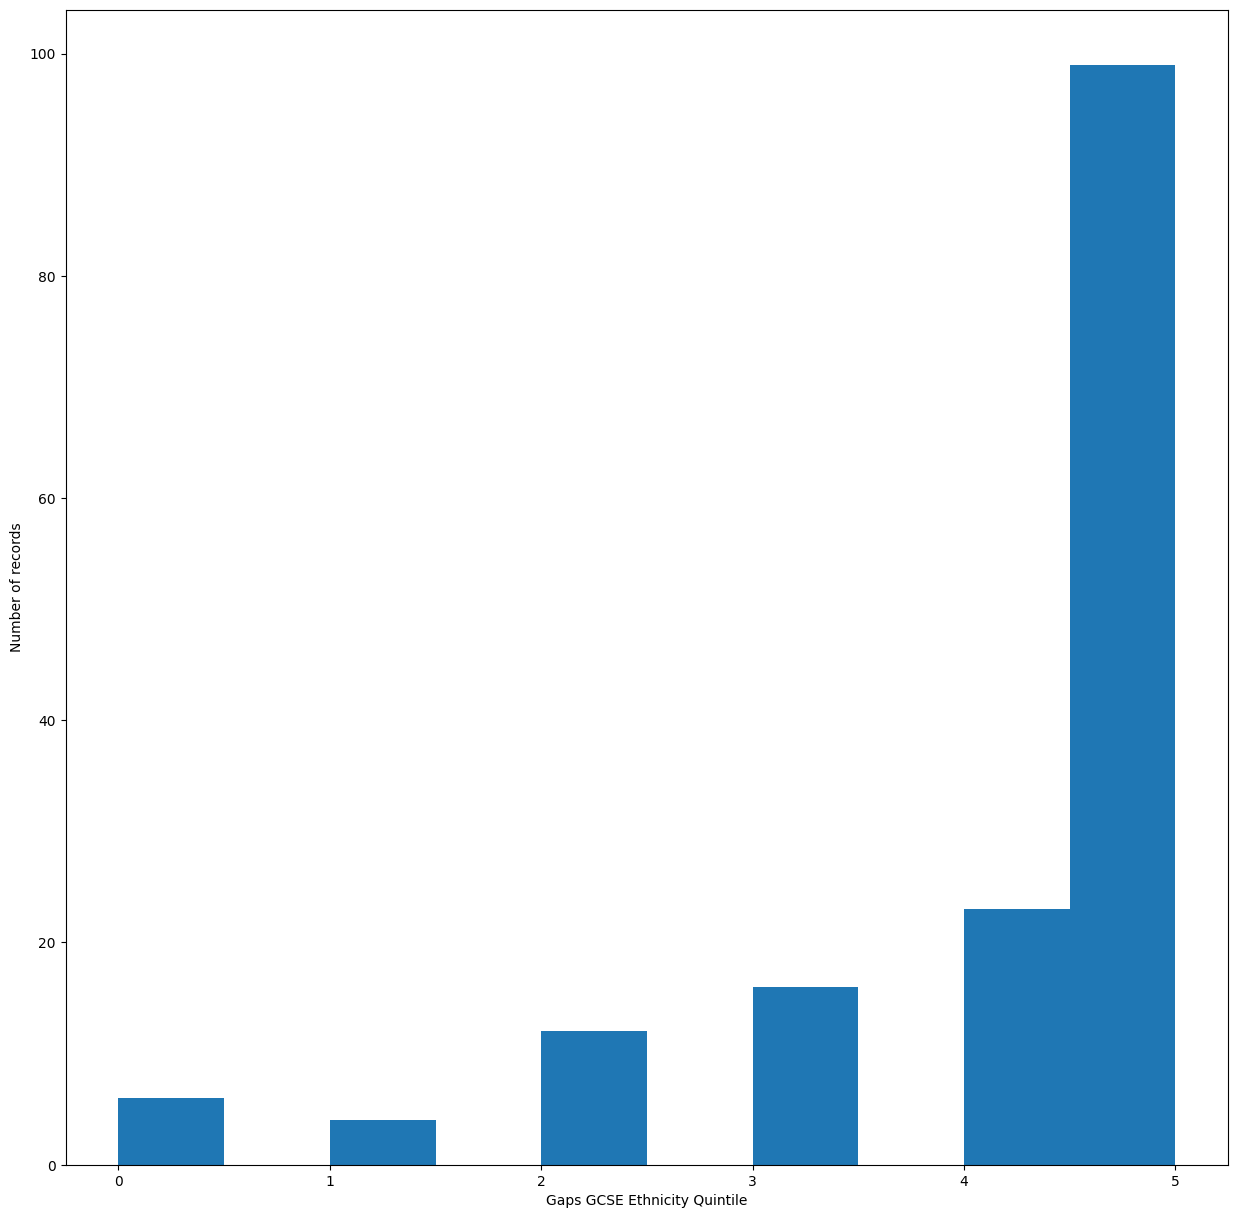

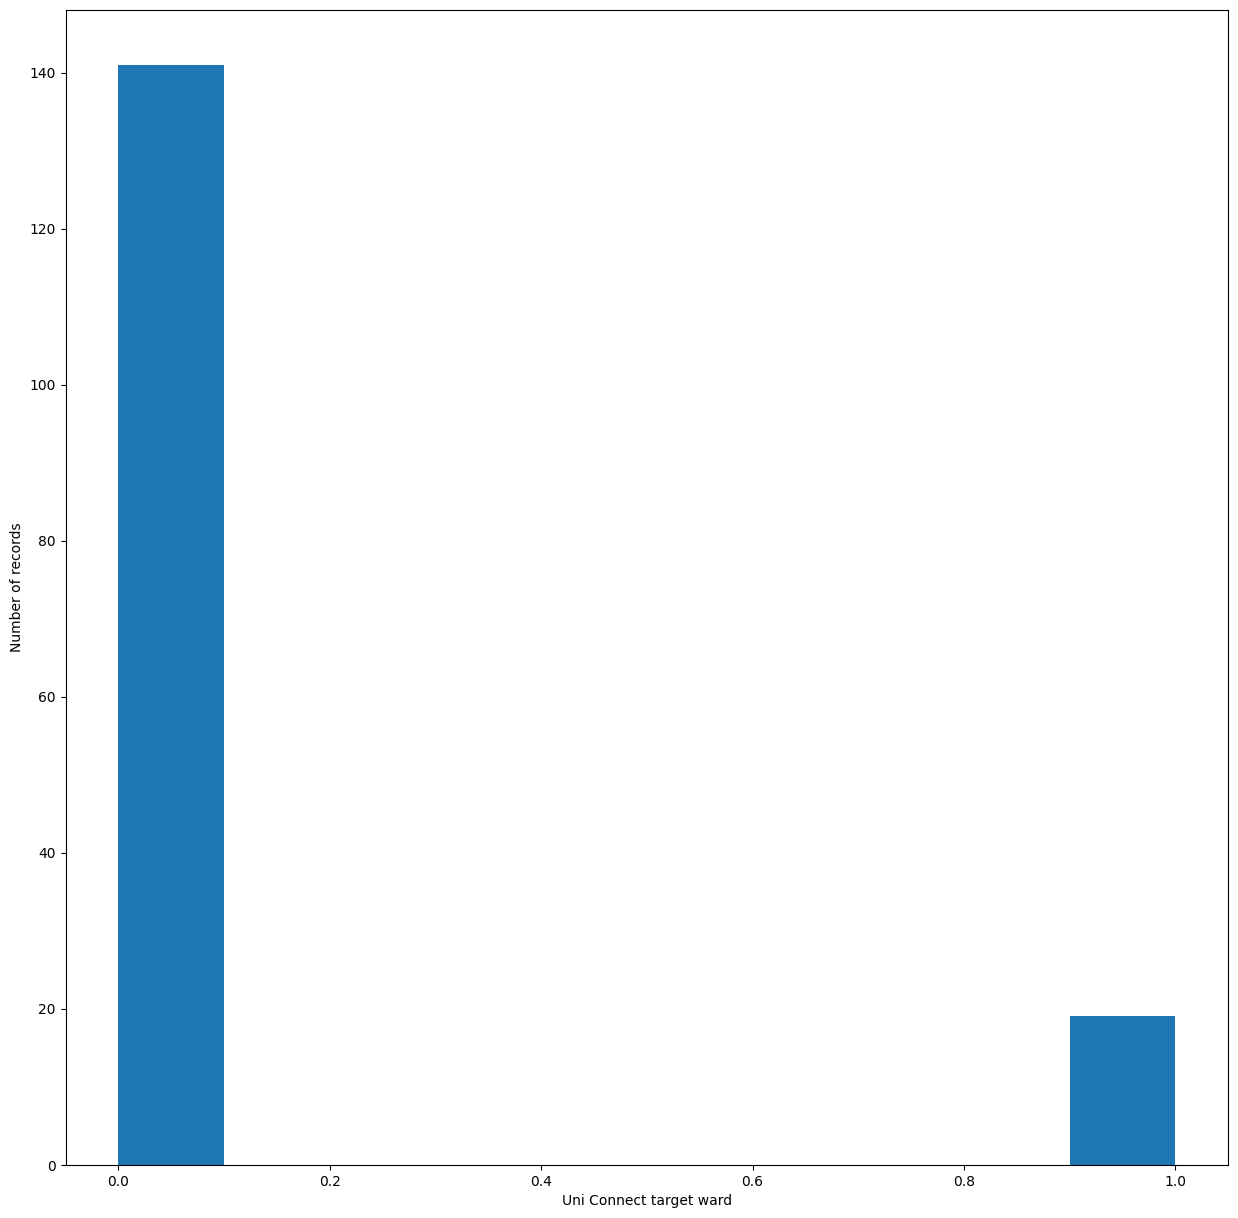

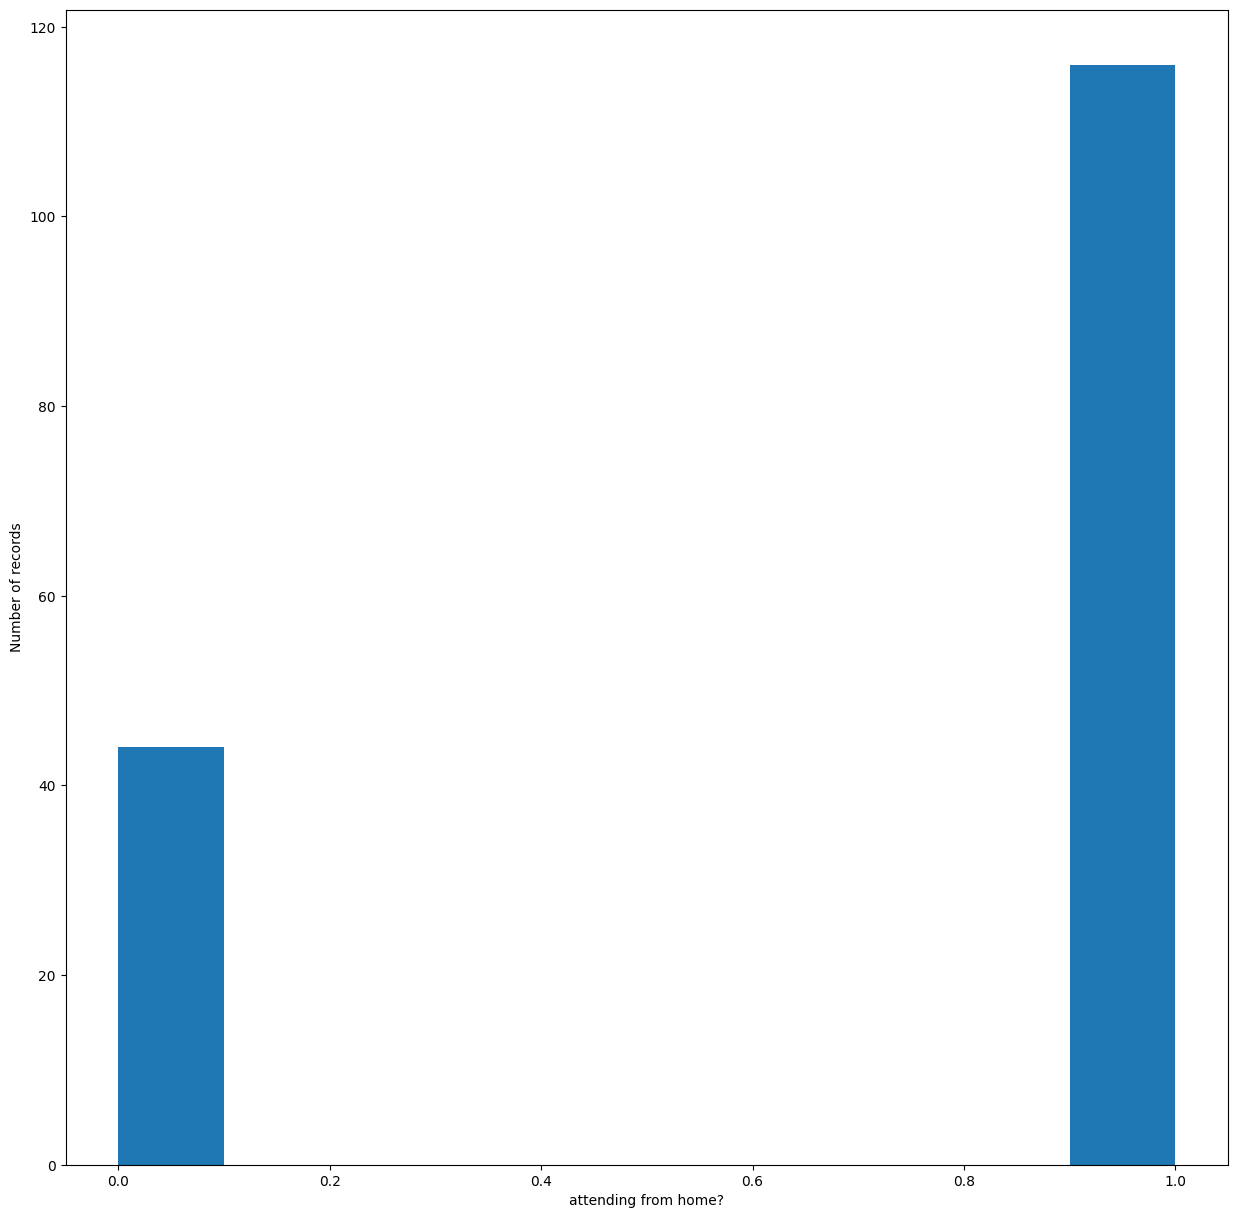

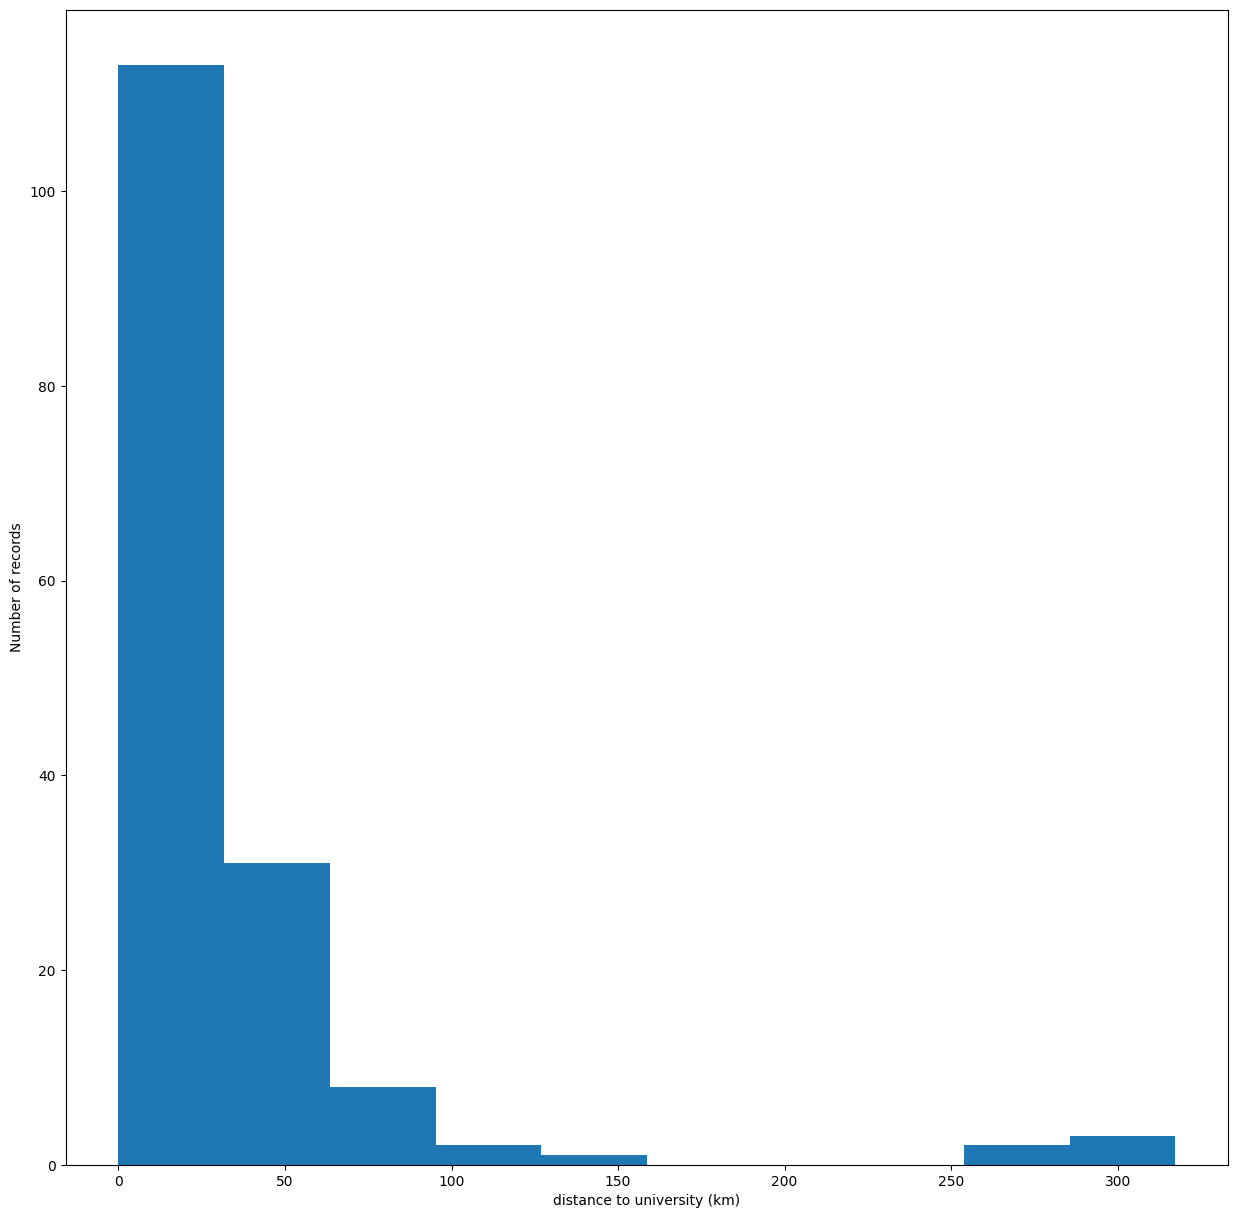

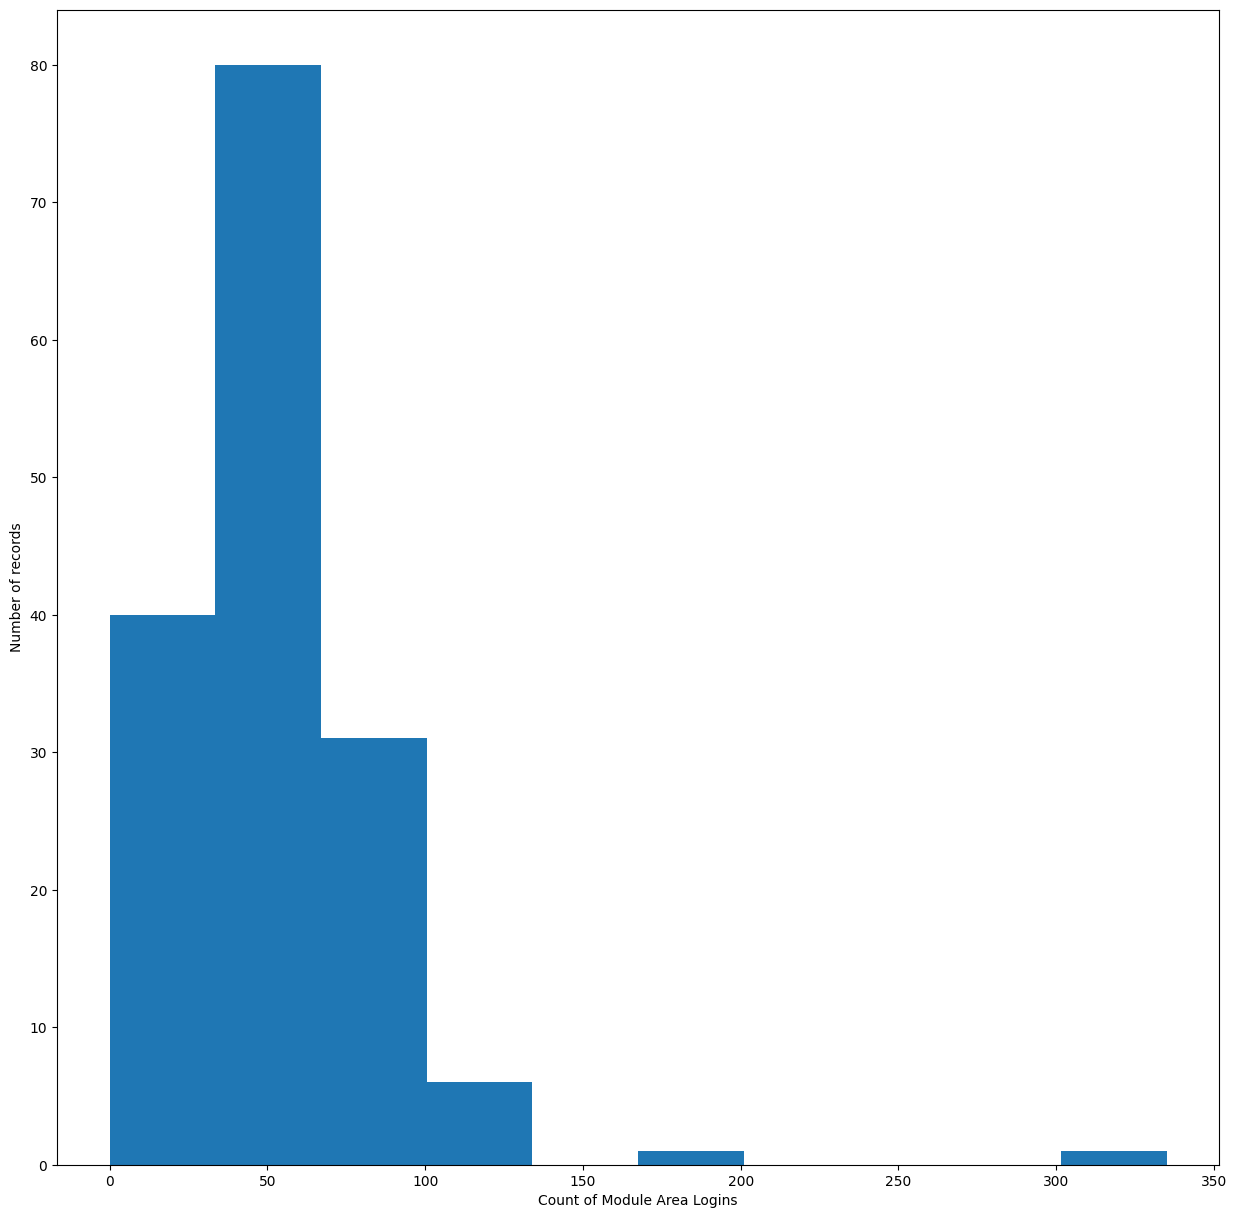

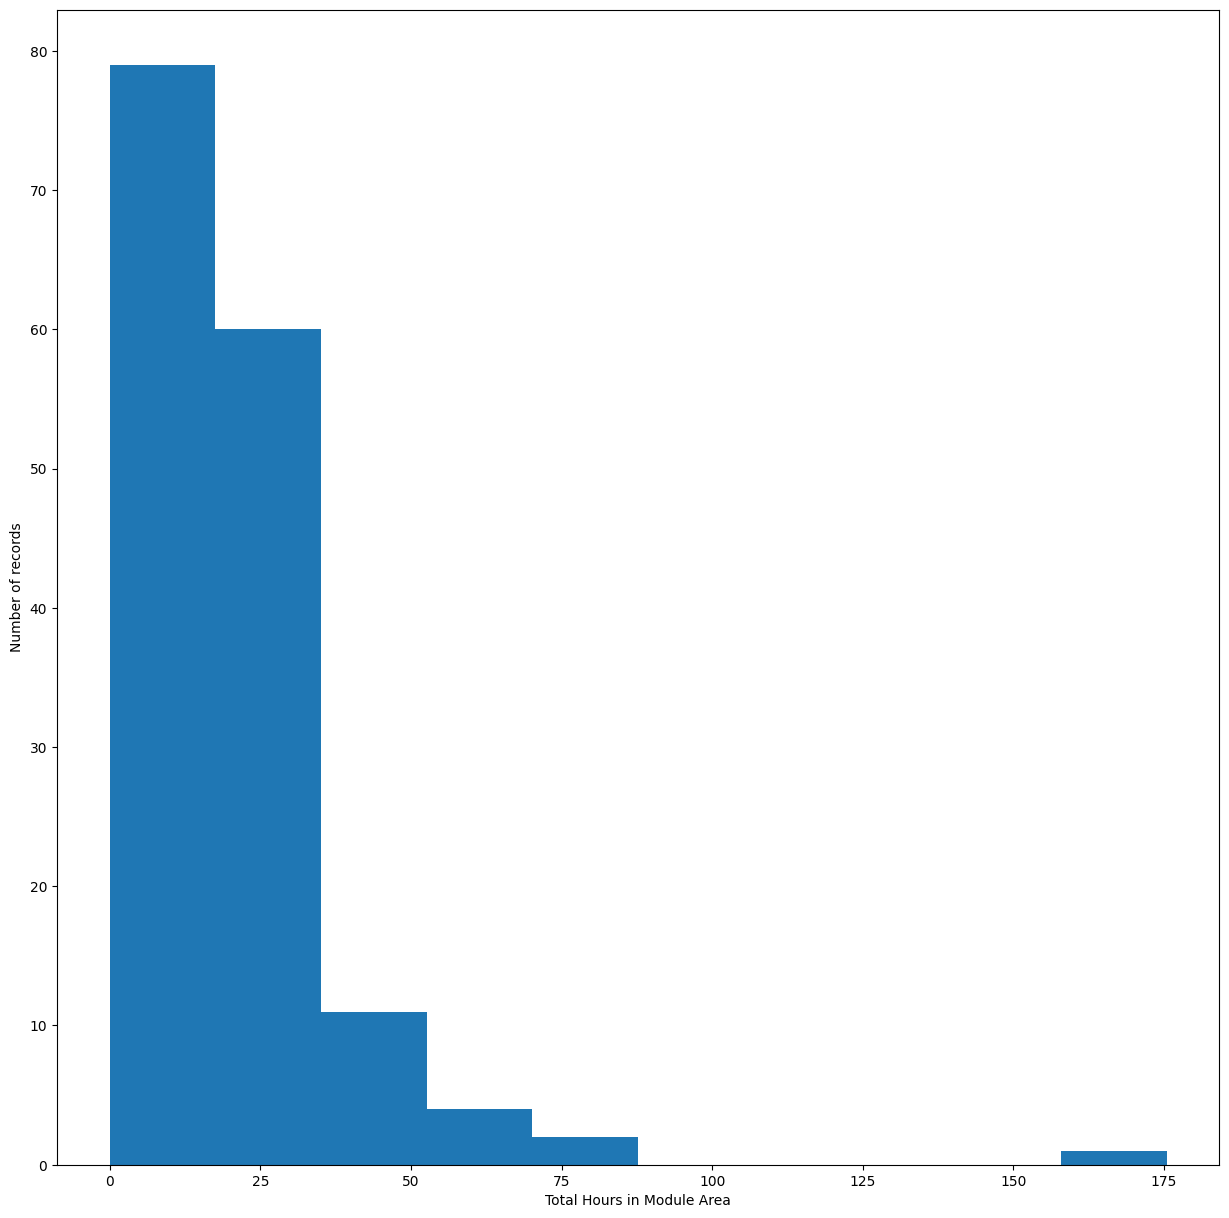

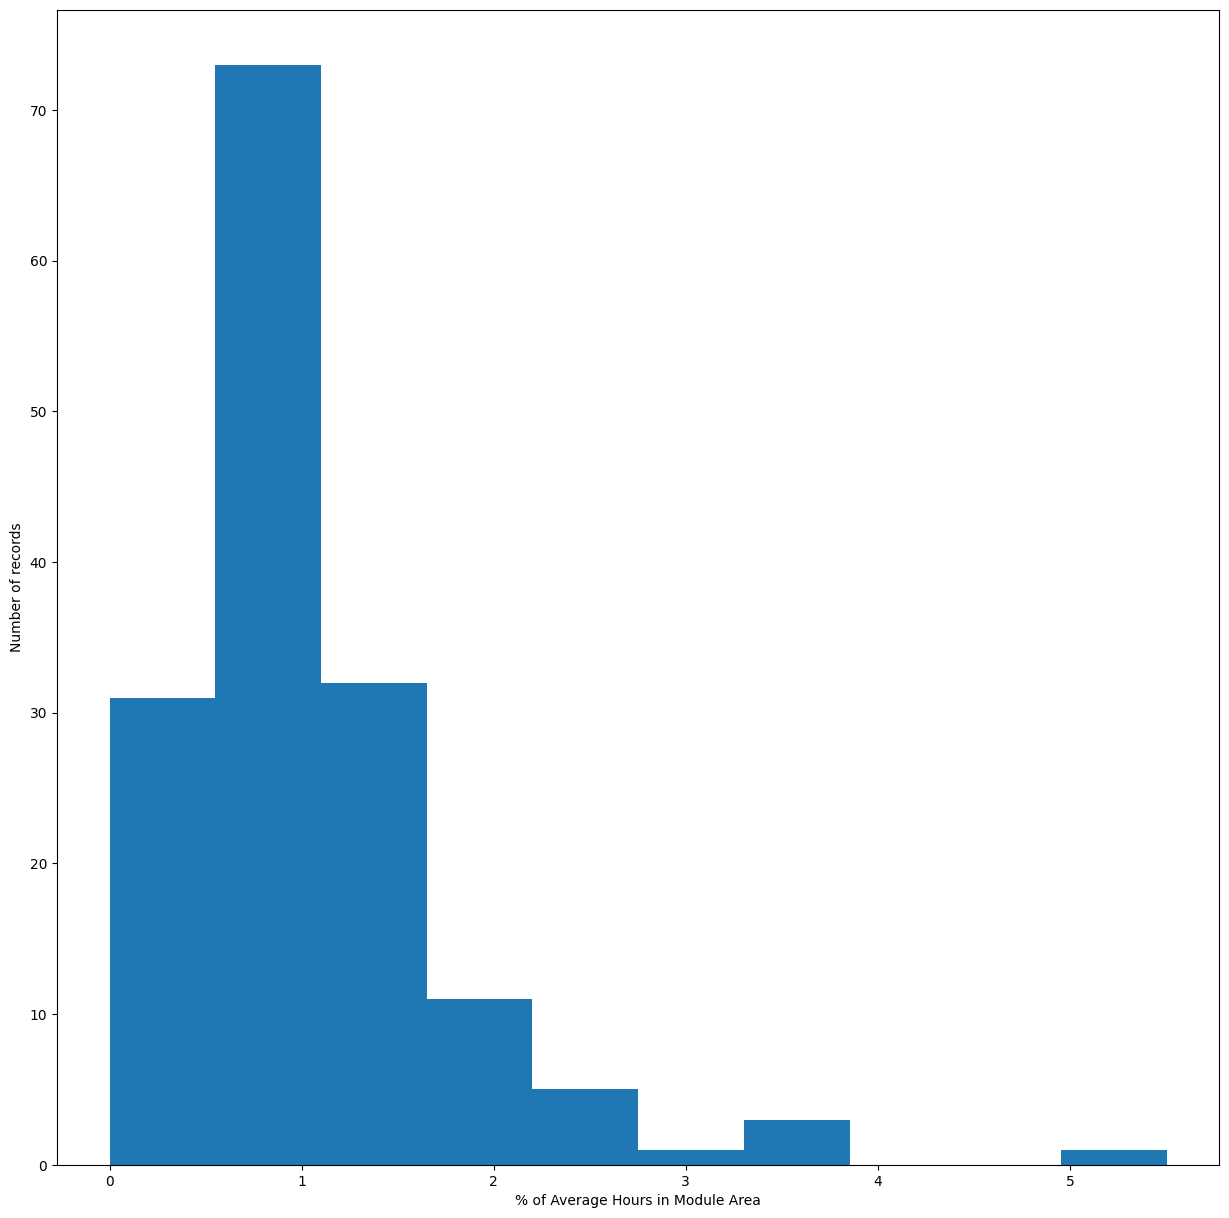

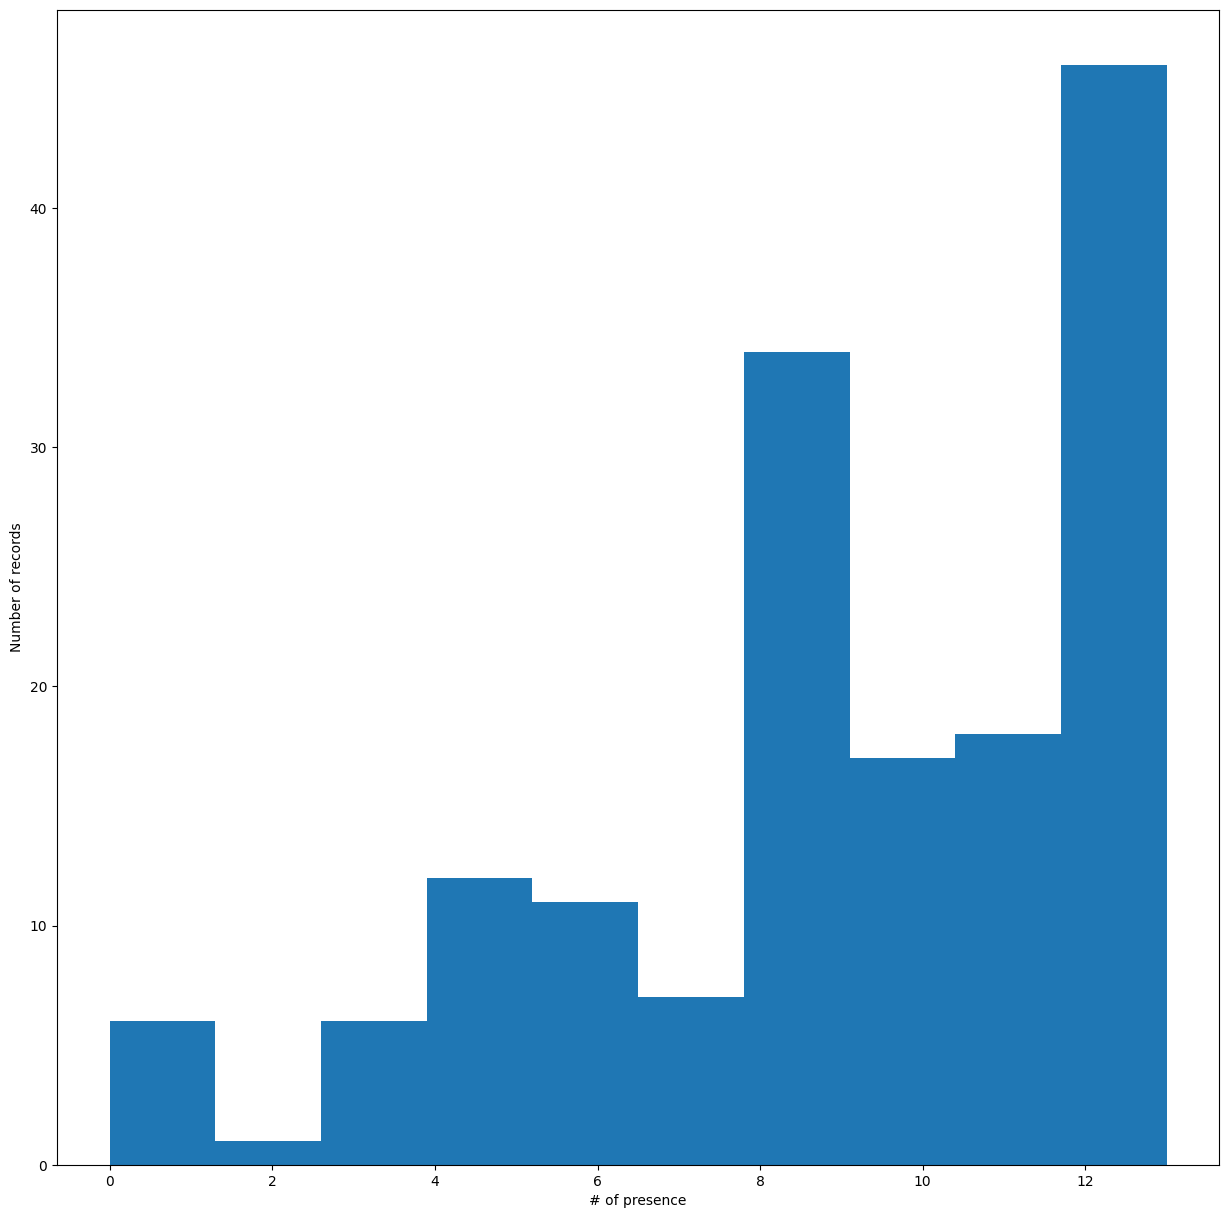

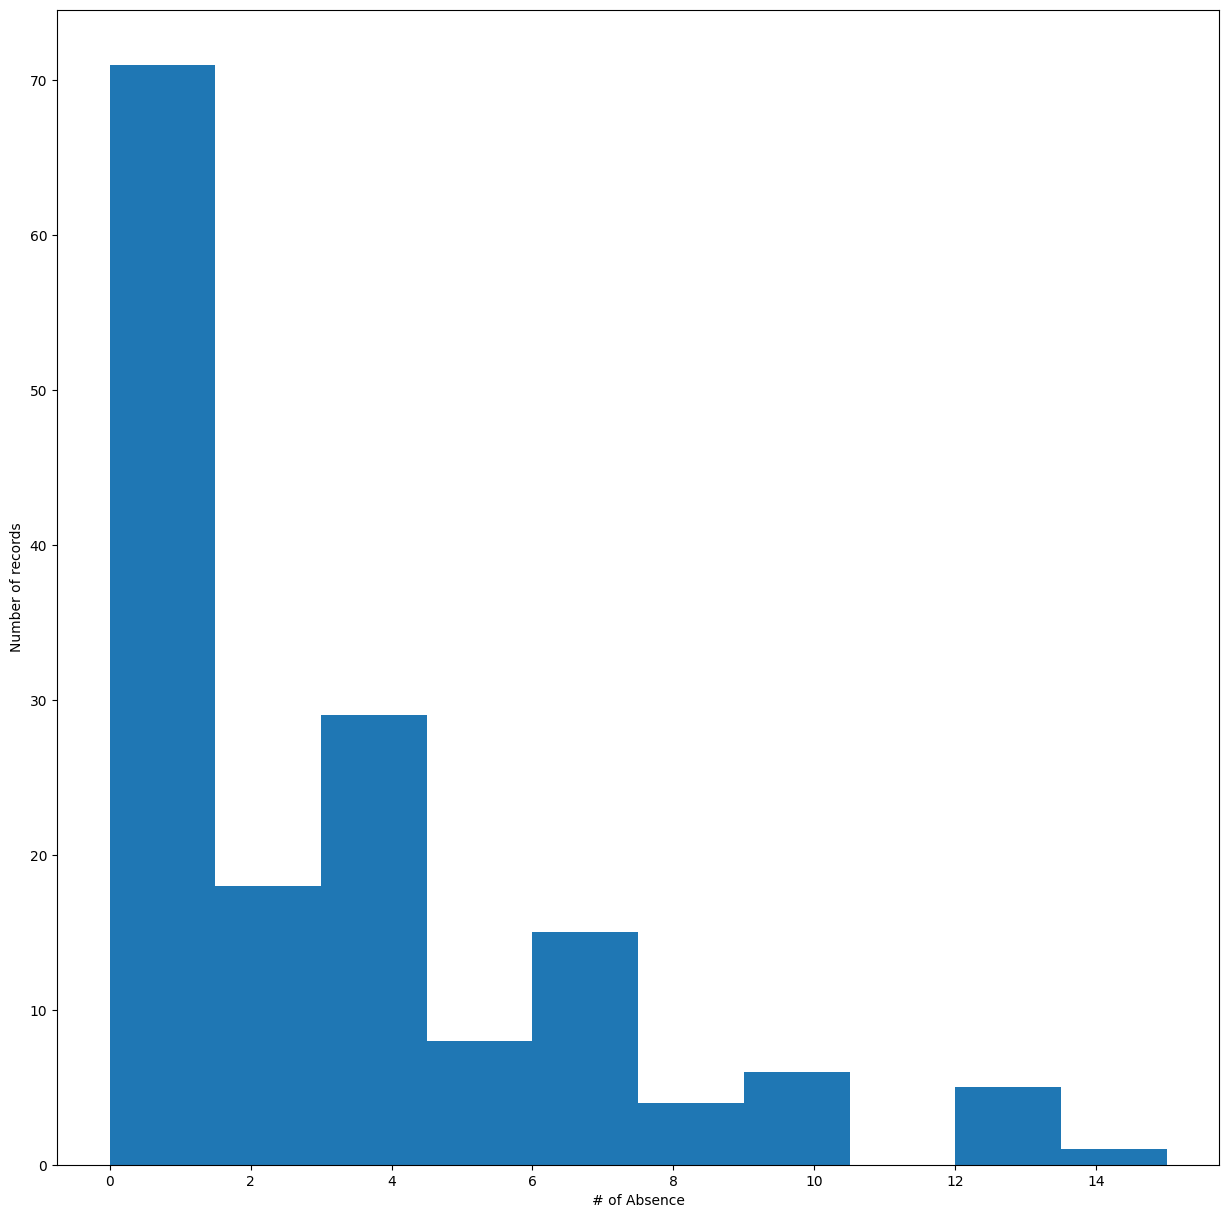

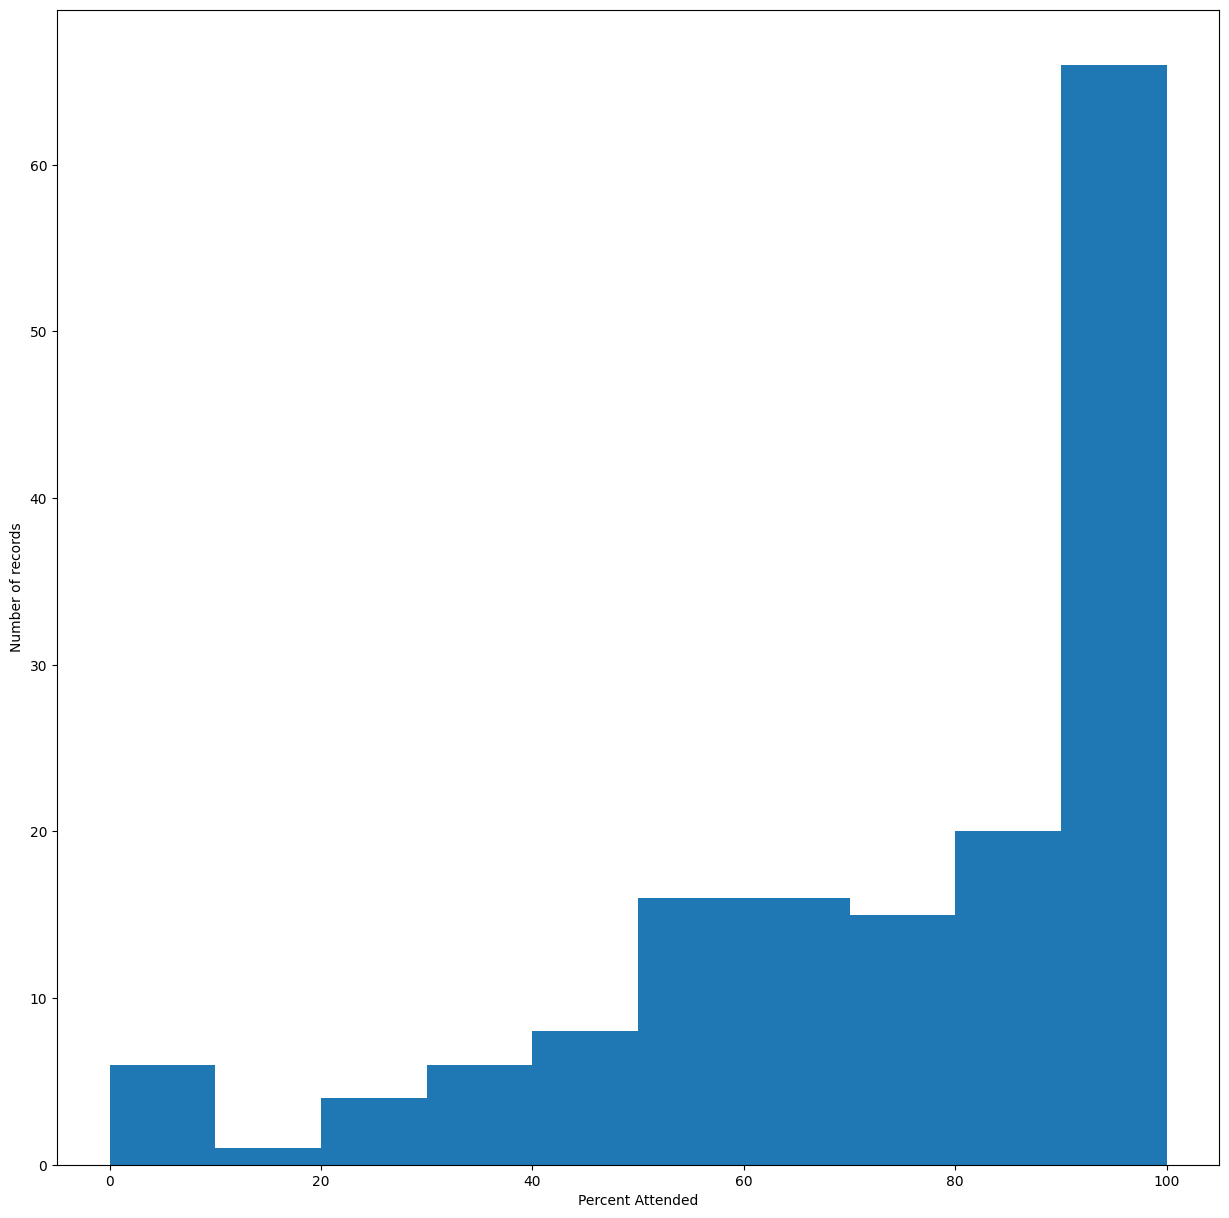

In [42]:
for cols in df_features.columns:
    plt.figure(figsize=(15,15))
    plt.hist(df_features[[cols]],bins=10)
    plt.xlabel(cols)
    plt.ylabel("Number of records")
    plt.show()

### Checking for outliers

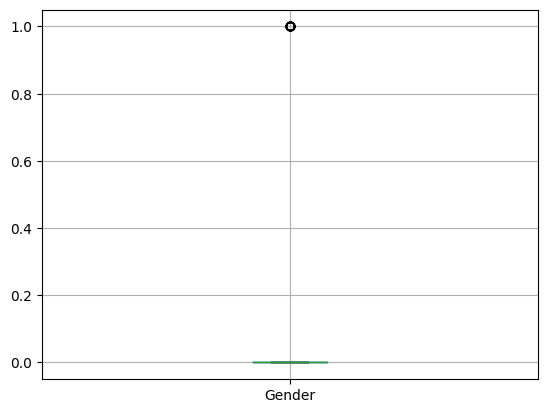

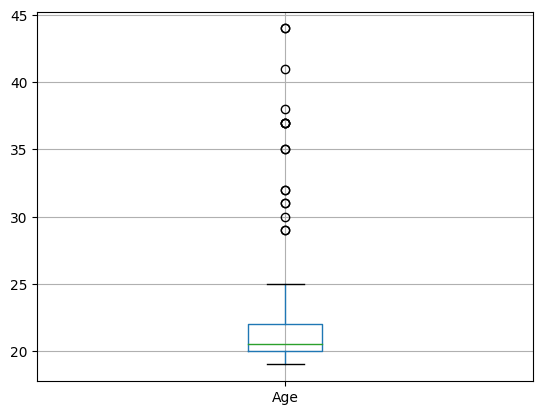

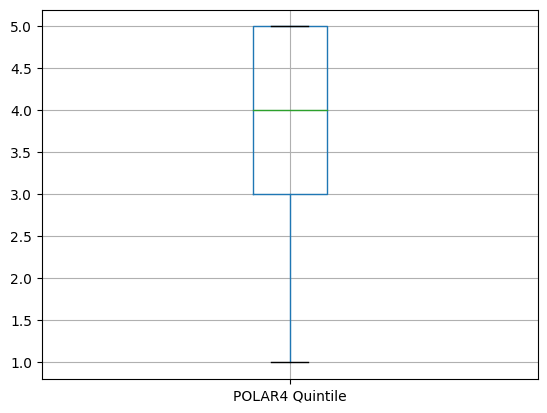

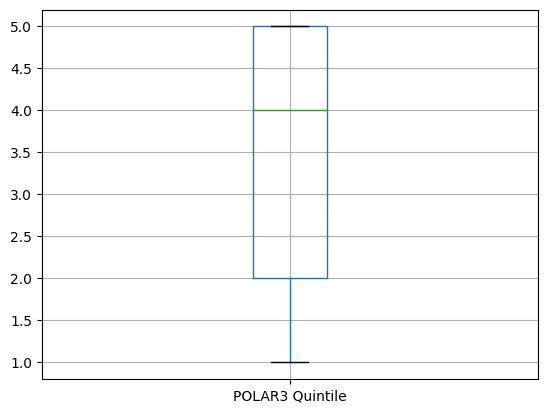

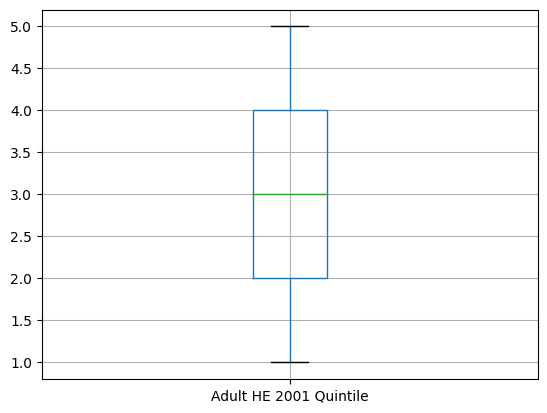

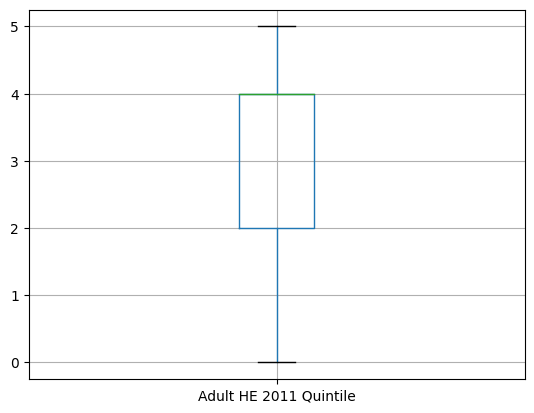

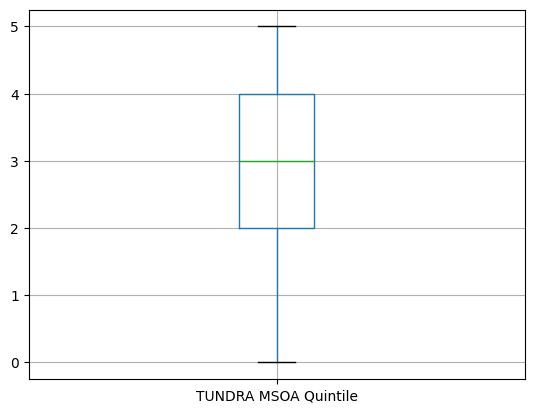

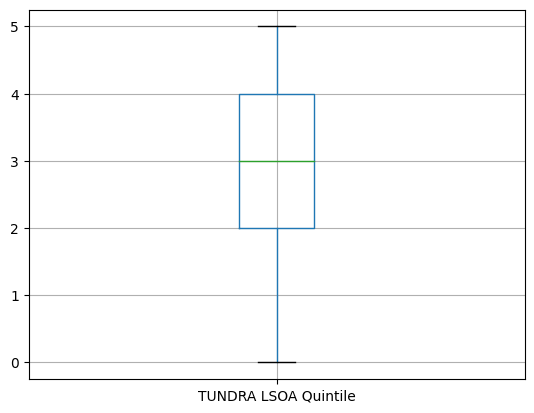

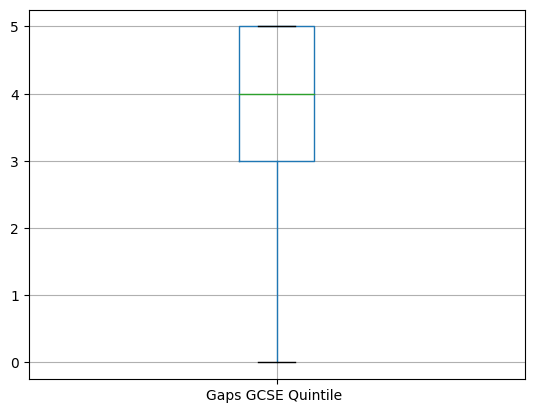

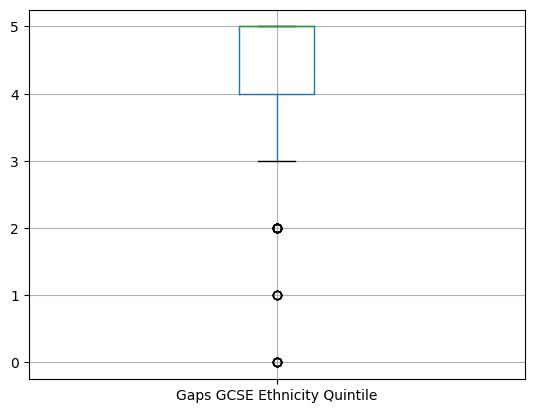

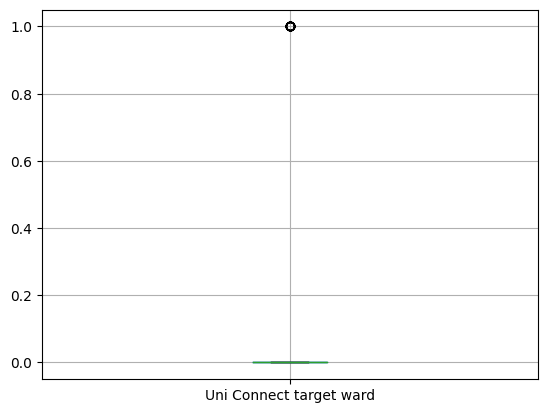

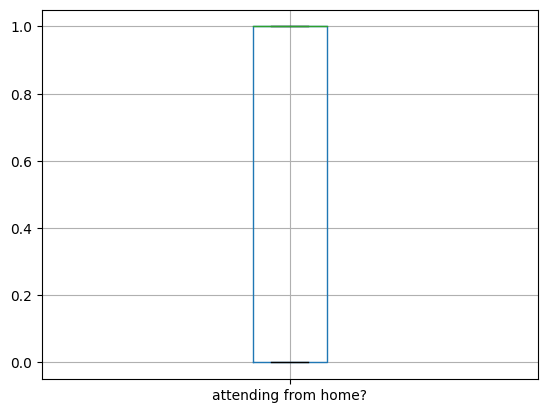

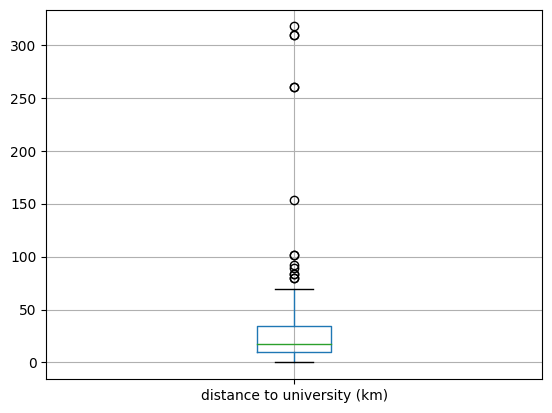

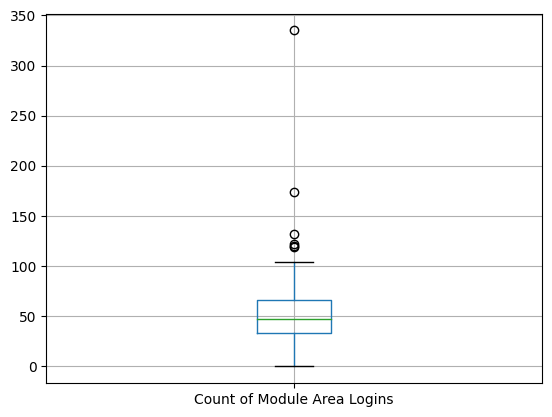

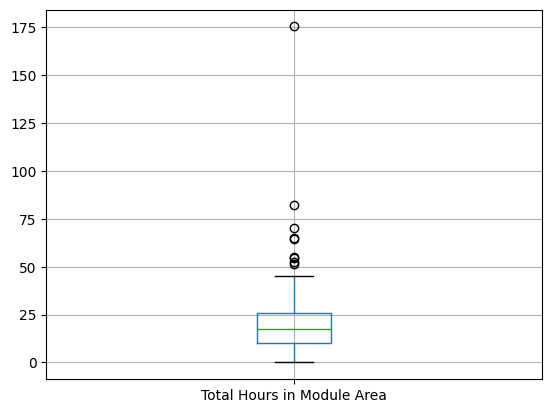

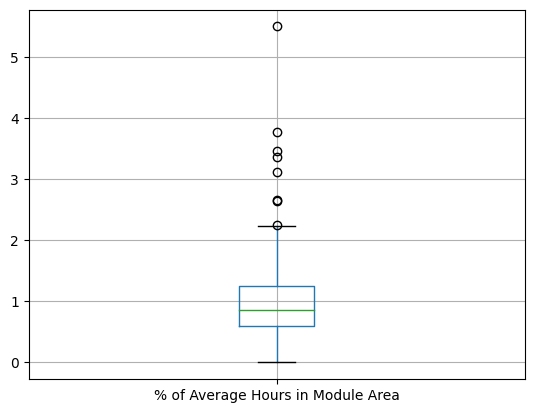

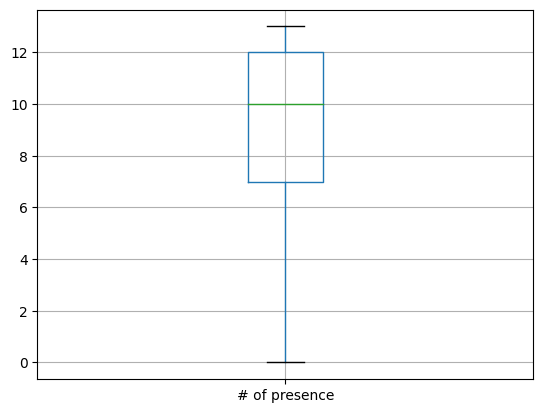

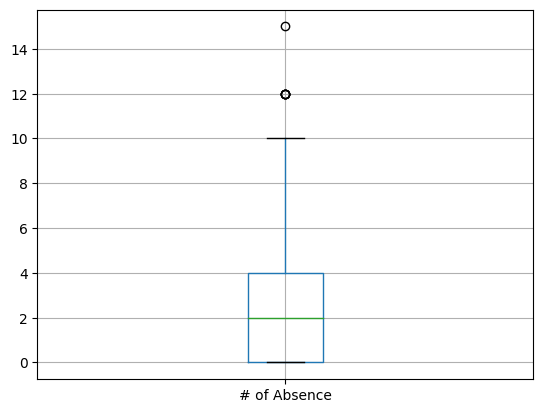

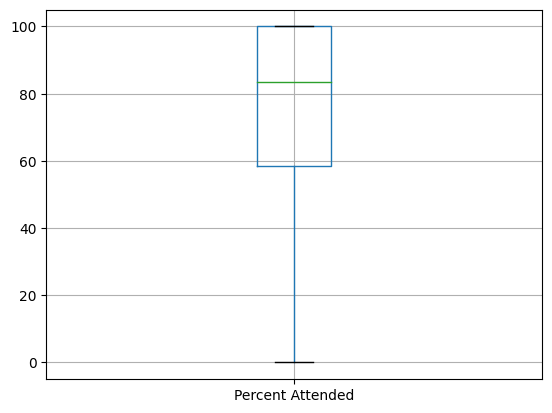

In [43]:
for cols in df_features.columns:
    df_features[[cols]].boxplot()
    plt.show()

### Removing outliers

In [44]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_features_no_outliers = df_features[(df_features >= lower_bound) & (df_features <= upper_bound)]
df_features_no_outliers

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended
0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,40.0,24.25,1.856388,8.0,1.0,88.89
1,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,18.0,12.51,0.957667,8.0,1.0,88.89
2,0.0,22.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,0.0,0.000000,30.0,9.29,0.711169,3.0,6.0,33.33
3,0.0,24.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0,0.0,1.0,10.965952,25.0,16.38,1.253923,8.0,1.0,88.89
4,0.0,24.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,4.0,0.0,1.0,14.203295,38.0,13.26,1.015081,9.0,NaN,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping data who has missing value
- Data is having missing values because we have removed outliers from the dataset

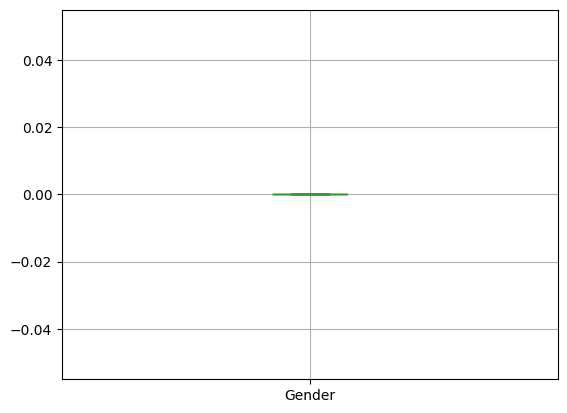

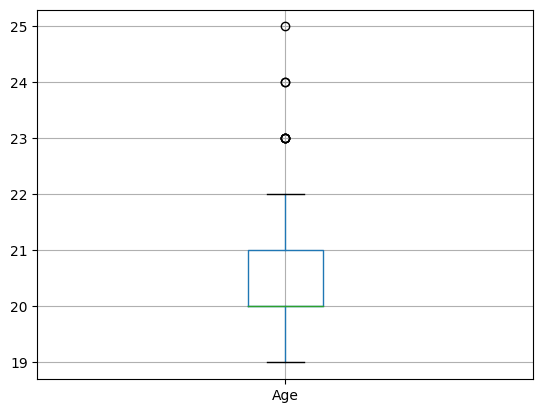

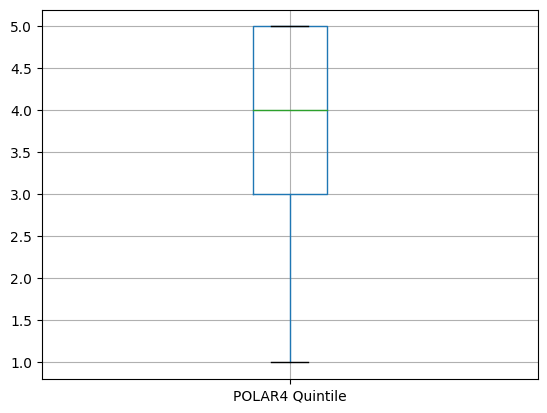

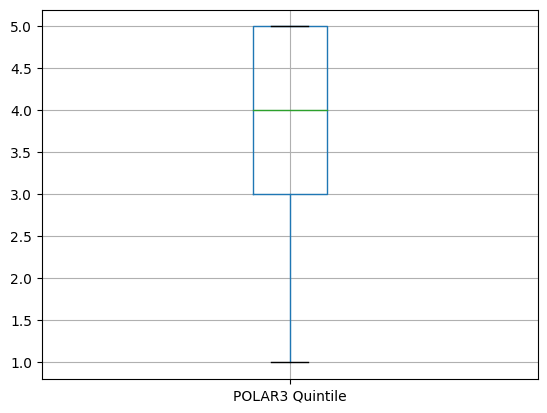

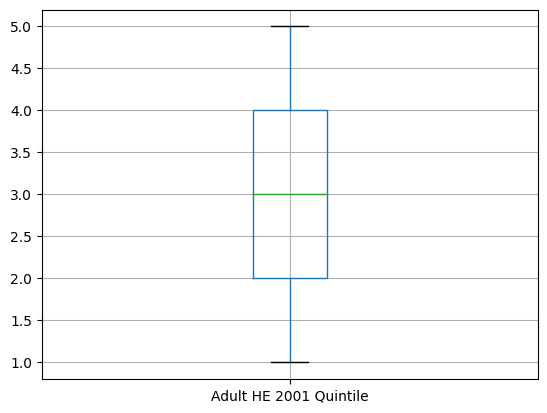

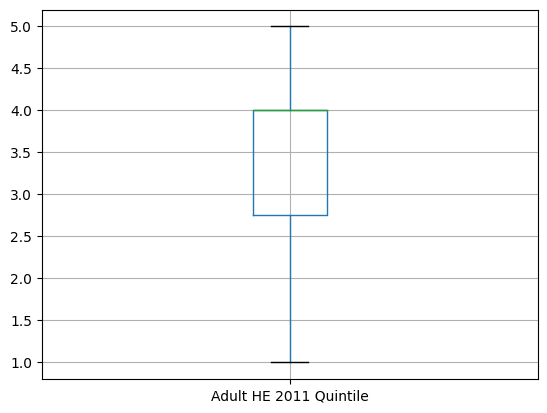

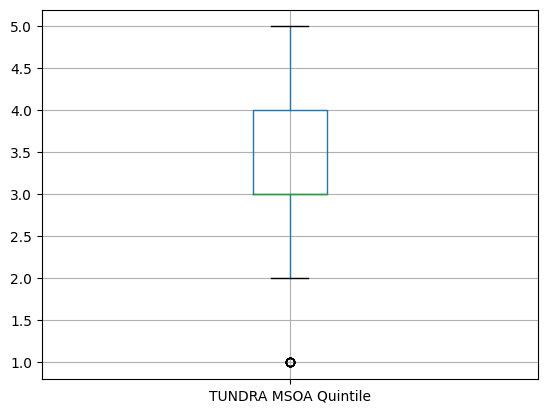

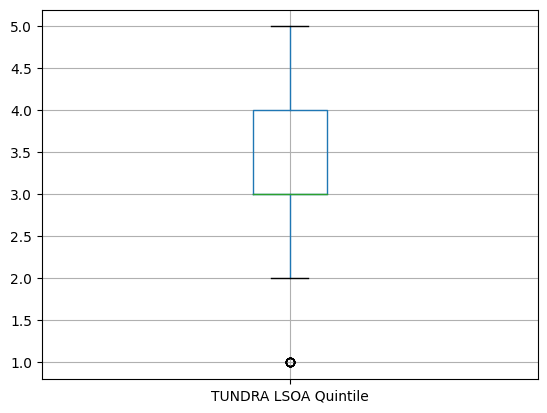

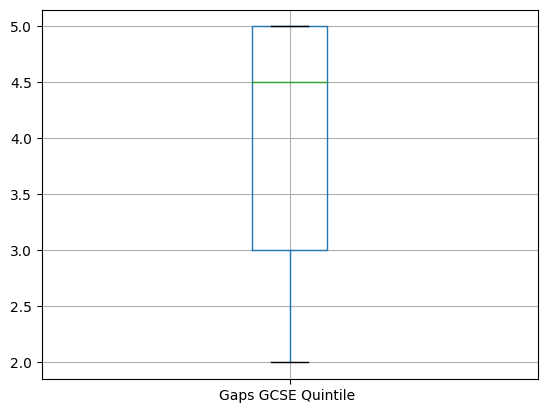

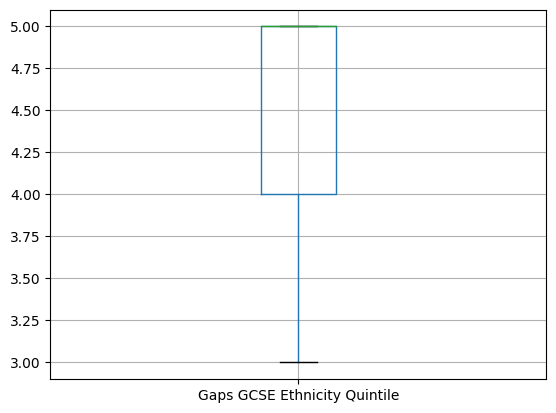

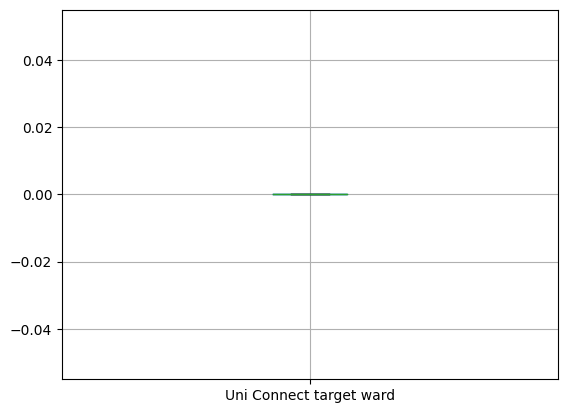

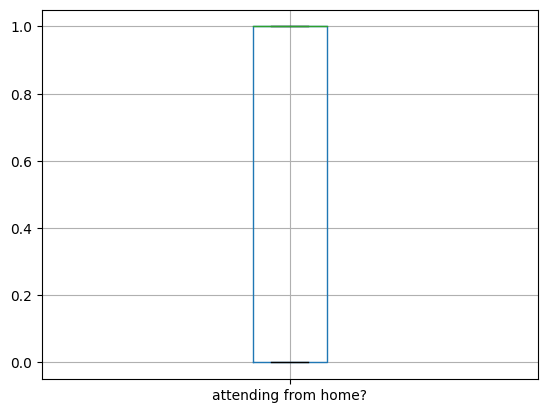

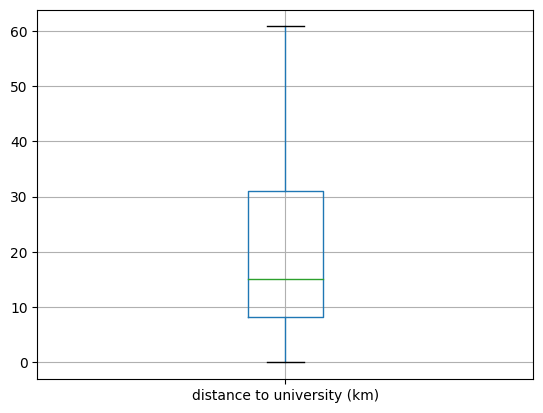

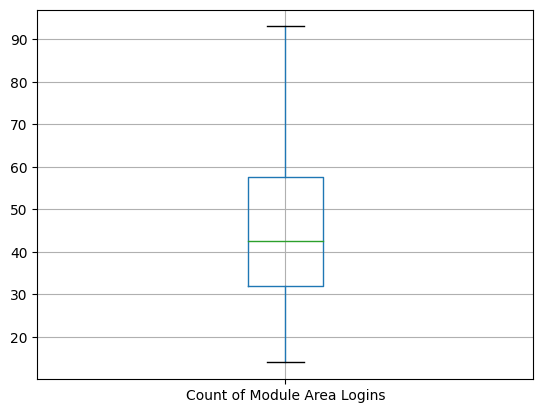

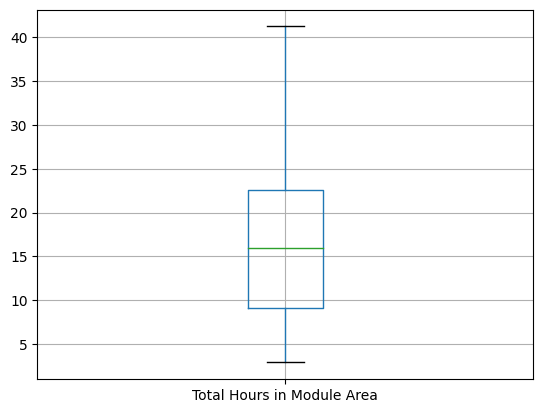

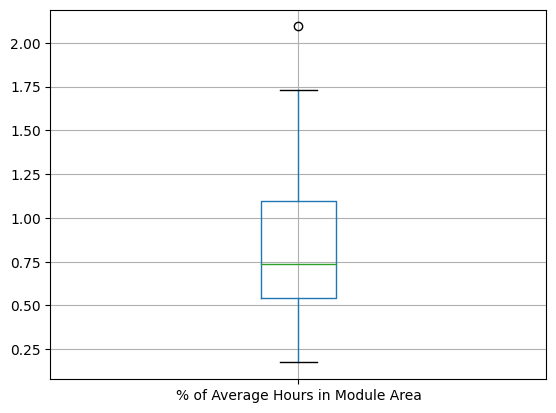

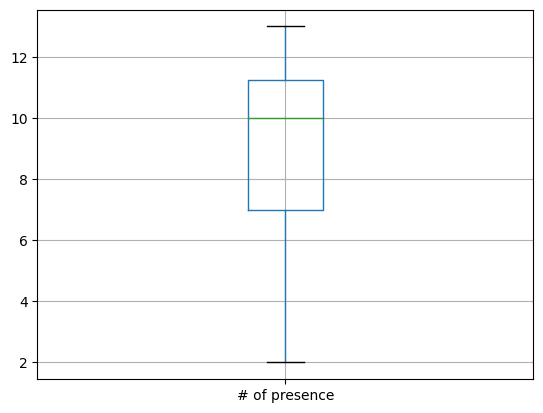

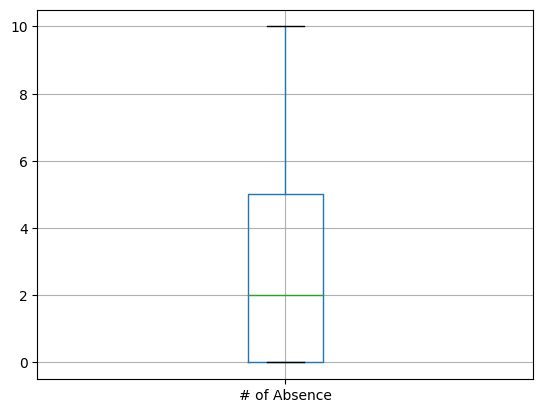

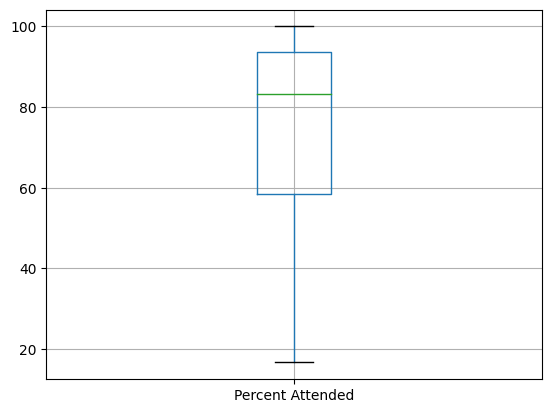

In [45]:
df_features_no_outliers = df_features_no_outliers.dropna()
# Again checking for outlier after removed them.
for cols in df_features.columns:
    df_features_no_outliers[[cols]].boxplot()
    plt.show()

### Normalizing the dataset

In [48]:
scaler = MinMaxScaler()
df_features_scaled = scaler.fit_transform(df_features_no_outliers)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)
df_features_scaled

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended
0,0.0,0.500000,1.00,1.00,0.75,1.00,0.75,0.75,1.000000,1.0,0.0,0.0,0.000000,0.202532,0.167101,0.279654,0.090909,0.6,0.19996
1,0.0,0.833333,0.00,0.00,0.00,0.00,0.00,0.00,0.666667,1.0,0.0,1.0,0.180387,0.139241,0.351929,0.562485,0.545455,0.1,0.86668
2,0.0,0.500000,0.75,0.50,0.50,0.25,0.50,0.50,0.000000,0.0,0.0,0.0,0.000000,0.303797,0.180396,0.299998,0.090909,0.6,0.19996
3,0.0,0.666667,0.75,0.50,0.50,0.75,0.50,0.50,0.666667,1.0,0.0,1.0,0.209643,0.113924,0.107664,0.188701,0.363636,0.3,0.60004
4,0.0,0.666667,0.50,0.75,0.50,0.75,0.50,0.50,1.000000,1.0,0.0,0.0,0.000000,0.784810,0.698384,0.394084,0.909091,0.0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,1.00,1.00,1.00,1.00,1.00,1.00,0.666667,1.0,0.0,1.0,0.459236,0.291139,0.402763,0.299437,0.181818,0.8,0.20000
76,0.0,0.333333,0.75,1.00,0.75,1.00,0.75,0.75,1.000000,1.0,0.0,1.0,0.291269,0.088608,0.093587,0.046854,0.454545,0.4,0.50000
77,0.0,0.500000,0.50,0.75,0.50,0.75,0.50,0.50,1.000000,1.0,0.0,1.0,0.168374,0.518987,0.606361,0.465767,0.636364,0.2,0.70000
78,0.0,0.166667,1.00,1.00,0.75,0.75,0.50,0.50,1.000000,1.0,0.0,0.0,0.533951,0.354430,0.314390,0.227240,0.454545,0.5,0.50000


### Final Features & Labels

In [49]:
df_final_features = df_features_scaled.copy()
df_final_label = df_label.copy()

`Note:` Dataset preprocessing has loaded JSON dataset, try to apply more data preprocessing techniques as per GNU LICENSE. For more visit: www.github.com/itechdp